# Crime and Emergency Response Analysis
Team 05 - Charles Wei, Tanmay Yenge, Mokhinur Talibzhanova, Michael Allieri, Ahrar Karim


## Executive Summary
**Objectives**

* Understand Borough-Level Crime Trends: Examine how crime types and arrest frequencies vary across Manhattan, Brooklyn, Queens, the Bronx, and Staten Island.

* Evaluate Emergency Response Efficiency: Assess how EMS and 911 response times differ by borough and how these relate to crime intensity.

* Analyze Demographic and Temporal Patterns: Investigate how age, time of year, and day of the week influence crime and arrest rates.

* Support Data-Driven Decision-Making: Provide insights that help city leaders allocate resources and design strategies for improved safety outcomes.



**Methods**

* Data from NYPD and NYC Open Data platforms were analyzed using Python. The process included data cleaning, merging, and visualization with tools such as Pandas, Matplotlib, and Seaborn.
* Fifteen graphs were created to explore borough-level crime patterns, EMS response times, demographic distributions, and temporal trends.
* Comparative and geospatial analyses were used to identify correlations between crime frequency, socioeconomic conditions, and response performance.



**Key Findings**


* **Borough Differences:** Manhattan reports the highest number of Petit Larceny arrests, while the Bronx leads in Assault arrests and faces the longest and most inconsistent EMS response times. Brooklyn shows consistently high arrest levels across multiple offenses, and Staten Island remains the safest borough with the fewest arrests.

* **Demographics:** Individuals aged 25–44 account for most arrests, with a sharp decline among older groups.

* **Temporal Trends:** Both crime and emergency incidents rise on specific days and during certain seasons, suggesting predictable patterns in public safety demand.

* **Geographic and Socioeconomic Insights:** Shootings are concentrated in parts of the Bronx and Brooklyn, often within neighborhoods experiencing greater economic challenges. These same areas also experience slower emergency response times, highlighting inequities in service delivery.



**Recommendations**


* **Reallocate Resources:** Increase police and EMS presence in high-incident areas, particularly the Bronx and Brooklyn.
* **Improve Response Systems:** Enhance dispatch coordination, optimize routing, and address delays in EMS response times.
* **Strengthen Prevention Programs:** Develop community-based safety initiatives targeting high-risk age groups and neighborhoods.
* **Maintain Ongoing Monitoring:** Continue using data analytics to track trends, forecast service needs, and promote equitable public safety improvements across New York City.



##Problem Definition
This project aims to analyze crime patterns and emergency response disparities in New York. We will:

•	Identify crime hotspots and recurring patterns across neighborhoods.

•	Explore correlations between neighborhoods, crime rates, and types of offenses.

•	Assess how ambulance response times vary by neighborhood and crime levels.

•	Investigate potential systemic issues contributing to crime and delayed emergency response.


**Data Source:**

•	NYPD Shooting Incident Data (Historic) – Reported Crimes. (https://www.nyc.gov/site/nypd/stats/crime-statistics/citywide-crime-stats.page)

•	Emergency Response Incidents. (https://data.cityofnewyork.us/Public-Safety/Emergency-Response-Incidents/pasr-j7fb/about_data )

•	NYPD Arrest Data (Year to Date). (https://catalog.data.gov/dataset/nypd-arrest-data-year-to-date)

•	911 End-to-End Data. (https://catalog.data.gov/dataset/911-end-to-end-data)


**Motivation:**

Crime analysis in New York City is crucial as it has been one of the cities with the highest number of offences. Analyzing reported crimes across neighborhoods helps identify repeat offenders, ensure efficient police control, and improve public safety. The goal is to uncover underlying issues and possible causes for such behavior. Emergency response and crime are key aspects of society that directly affect people’s well-being. By analyzing and identifying patterns, this project seeks to improve community safety and overall quality of life.


## Data Description

Shootings
### 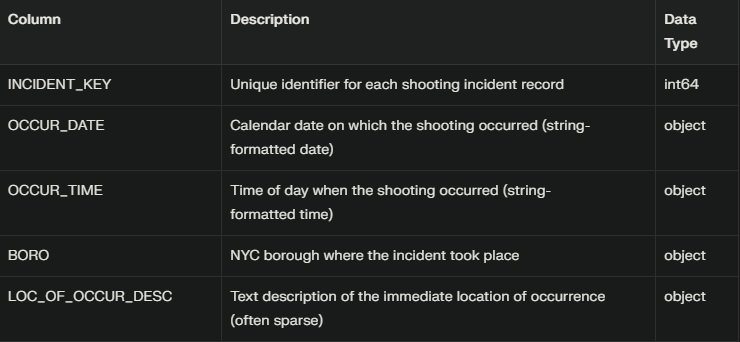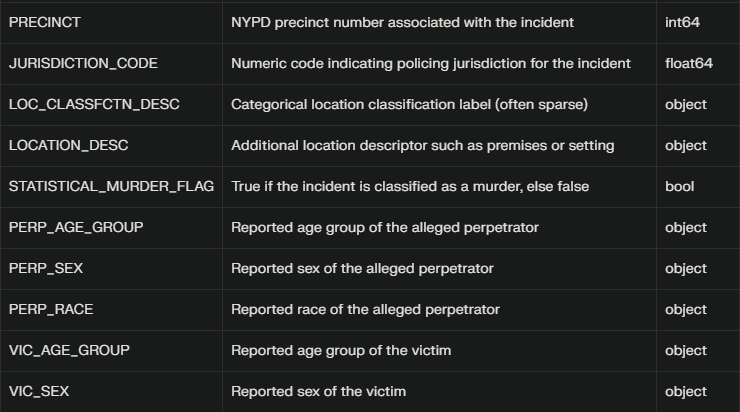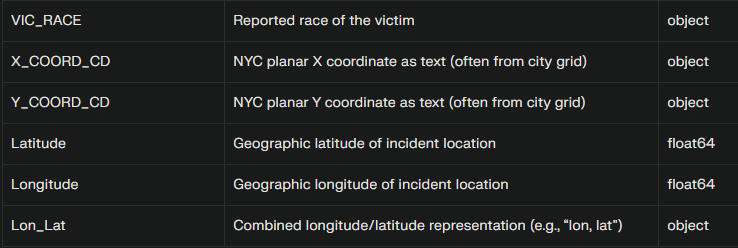

**Emergency**

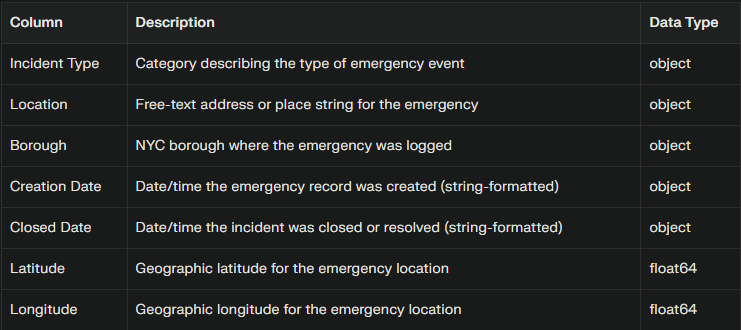

**Calls**

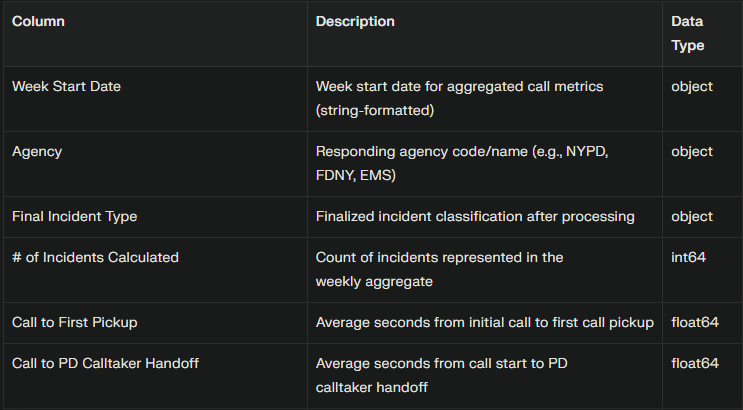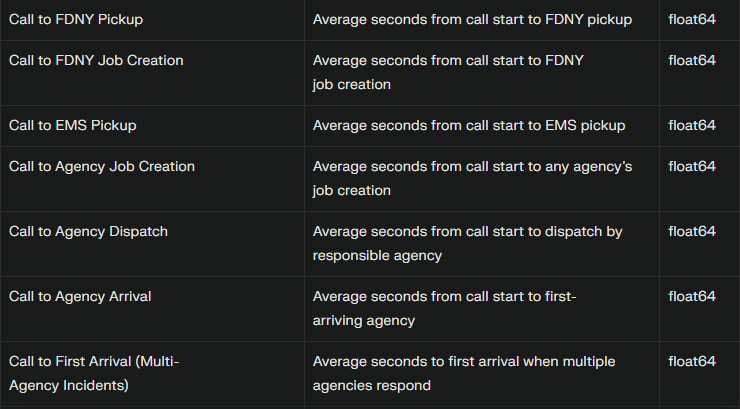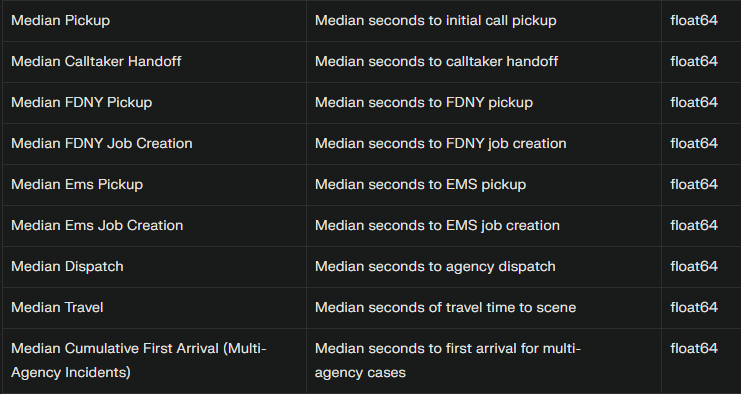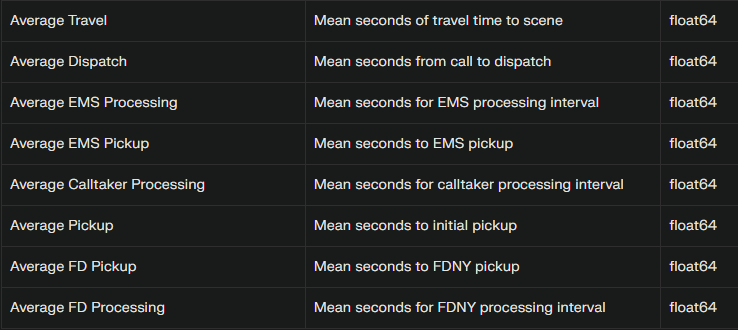

**Arrests**

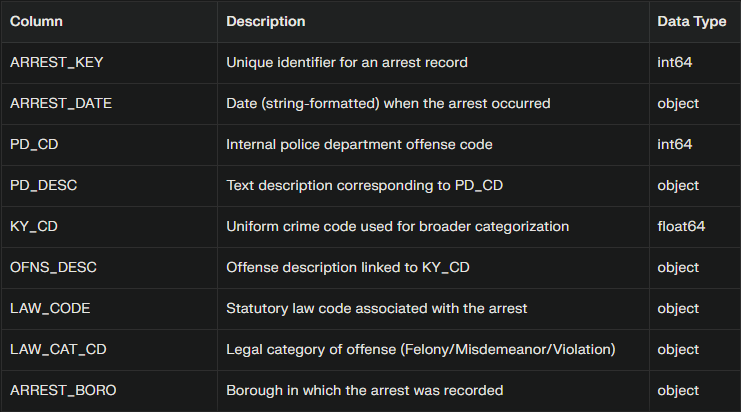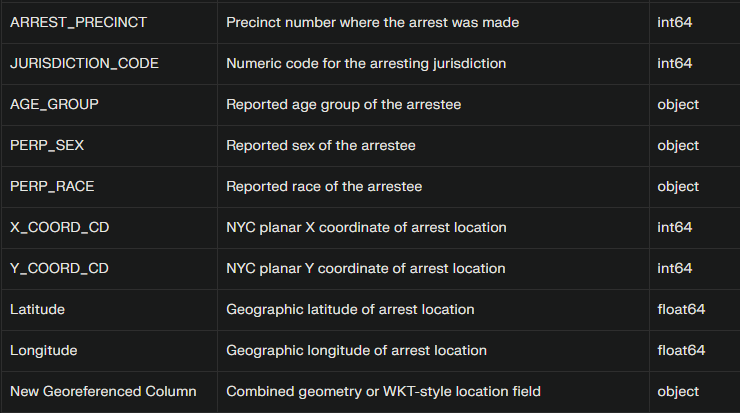

## Data Cleaning

In [ ]:
import pandas as pd
from google.colab import drive
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
folder_path = "/content/drive/MyDrive/"
shootings = pd.read_csv(folder_path + "NYPD_Shooting_Incident_Data__Historic__20250928.csv")
emergency = pd.read_csv(folder_path + "Emergency_Response_Incidents_20250928.csv")
arrests = pd.read_csv(folder_path + "NYPD_Arrest_Data__Year_to_Date_.csv")
calls = pd.read_csv(folder_path + "911_End-to-End_Data.csv")

In [ ]:
for name, df in {"shootings": shootings, "emergency": emergency, "arrests": arrests, "calls": calls}.items():
    print(f"\n=== {name} ===")
    print(df.shape)
    df.info()
    display(df.head())


=== shootings ===
(29744, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29744 entries, 0 to 29743
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             29744 non-null  int64  
 1   OCCUR_DATE               29744 non-null  object 
 2   OCCUR_TIME               29744 non-null  object 
 3   BORO                     29744 non-null  object 
 4   LOC_OF_OCCUR_DESC        4148 non-null   object 
 5   PRECINCT                 29744 non-null  int64  
 6   JURISDICTION_CODE        29742 non-null  float64
 7   LOC_CLASSFCTN_DESC       4148 non-null   object 
 8   LOCATION_DESC            14767 non-null  object 
 9   STATISTICAL_MURDER_FLAG  29744 non-null  bool   
 10  PERP_AGE_GROUP           20400 non-null  object 
 11  PERP_SEX                 20434 non-null  object 
 12  PERP_RACE                20434 non-null  object 
 13  VIC_AGE_GROUP            29744 non-null  obje

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,231974218,08/09/2021,01:06:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1006343,234270,40.809673,-73.920193,POINT (-73.92019278899994 40.80967347200004)
1,177934247,04/07/2018,19:48:00,BROOKLYN,NaN,79,0.0,NaN,NaN,True,...,M,WHITE HISPANIC,25-44,M,BLACK,1000082.937500000000000,189064.671875000000000,40.685610,-73.942913,POINT (-73.94291302299996 40.685609672000055)
2,255028563,12/02/2022,22:57:00,BRONX,OUTSIDE,47,0.0,STREET,GROCERY/BODEGA,False,...,(null),(null),25-44,M,BLACK,1020691,257125,40.872349,-73.868233,POINT (-73.868233 40.872349)
3,25384540,11/19/2006,01:50:00,BROOKLYN,NaN,66,0.0,NaN,PVT HOUSE,True,...,U,UNKNOWN,18-24,M,BLACK,985107.312500000000000,173349.796875000000000,40.642490,-73.996912,POINT (-73.99691224999998 40.642489932000046)
4,72616285,05/09/2010,01:58:00,BRONX,NaN,46,0.0,NaN,MULTI DWELL - APT BUILD,True,...,M,BLACK,<18,F,BLACK,1009853.500000000000000,247502.562500000000000,40.845984,-73.907461,POINT (-73.90746098599993 40.84598358900007)



=== emergency ===
(11750, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11750 entries, 0 to 11749
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Incident Type  11750 non-null  object 
 1   Location       10873 non-null  object 
 2   Borough        11750 non-null  object 
 3   Creation Date  11750 non-null  object 
 4   Closed Date    8642 non-null   object 
 5   Latitude       10125 non-null  float64
 6   Longitude      10125 non-null  float64
dtypes: float64(2), object(5)
memory usage: 642.7+ KB


,Incident Type,Location,Borough,Creation Date,Closed Date,Latitude,Longitude
0,Utility-Water Main,136-17 72 Avenue,Queens,01/16/2017 01:13:38 PM,NaN,40.714004,-73.829989
1,Structural-Sidewalk Collapse,927 Broadway,Manhattan,10/29/2016 12:13:31 PM,NaN,40.714422,-74.006076
2,Utility-Other,NaN,Manhattan,11/22/2016 08:53:17 AM,NaN,NaN,NaN
3,Administration-Other,Seagirt Blvd & Beach 9 Street,Queens,11/14/2016 03:53:54 PM,NaN,40.714004,-73.829989
4,Law Enforcement-Other,NaN,Brooklyn,10/29/2016 05:35:28 PM,NaN,NaN,NaN



=== arrests ===
(143494, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143494 entries, 0 to 143493
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                143494 non-null  int64  
 1   ARREST_DATE               143494 non-null  object 
 2   PD_CD                     143494 non-null  int64  
 3   PD_DESC                   143494 non-null  object 
 4   KY_CD                     143484 non-null  float64
 5   OFNS_DESC                 143494 non-null  object 
 6   LAW_CODE                  143494 non-null  object 
 7   LAW_CAT_CD                142807 non-null  object 
 8   ARREST_BORO               143494 non-null  object 
 9   ARREST_PRECINCT           143494 non-null  int64  
 10  JURISDICTION_CODE         143494 non-null  int64  
 11  AGE_GROUP                 143494 non-null  object 
 12  PERP_SEX                  143494 non-null  object 
 13  PERP_RACE     

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,298748497,01/01/2025,153,RAPE 3,104.0,RAPE,PL 1302501,F,M,28,0,65+,M,WHITE,997407,233806,40.808418,-73.952474,POINT (-73.9524740603515 40.8084177460021)
1,298909765,01/05/2025,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,Q,115,0,25-44,M,BLACK,0,0,0.000000,0.000000,POINT (0 0)
2,300825973,02/09/2025,153,RAPE 3,104.0,RAPE,PL 1302507,F,K,69,0,25-44,M,BLACK,1010541,175595,40.648614,-73.905257,POINT (-73.9052572032302 40.6486135510607)
3,299987678,01/24/2025,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,7,2,18-24,F,WHITE HISPANIC,0,0,0.000000,0.000000,POINT (0 0)
4,299731638,01/20/2025,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,73,0,25-44,M,BLACK,1010654,185578,40.676015,-73.904808,POINT (-73.904808 40.676015)



=== calls ===
(11294, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11294 entries, 0 to 11293
Data columns (total 30 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Week Start Date                                            11294 non-null  object 
 1   Agency                                                     11294 non-null  object 
 2   Final Incident Type                                        11222 non-null  object 
 3   # of Incidents Calculated                                  11294 non-null  int64  
 4   Call to First Pickup                                       11294 non-null  float64
 5   Call to PD Calltaker Handoff                               11293 non-null  float64
 6   Call to FDNY Pickup                                        1164 non-null   float64
 7   Call to FDNY Job Creation                                  1164 non

,Week Start Date,Agency,Final Incident Type,# of Incidents Calculated,Call to First Pickup,Call to PD Calltaker Handoff,Call to FDNY Pickup,Call to FDNY Job Creation,Call to EMS Pickup,Call to Agency Job Creation,...,Median Travel,Median Cumulative First Arrival (Multi-Agency Incidents),Average Travel,Average Dispatch,Average EMS Processing,Average EMS Pickup,Average Calltaker Processing,Average Pickup,Average FD Pickup,Average FD Processing
0,08/25/2025,NYPD (Non-CIP),Police Officer/Security Holding Suspect,102,3.61,126.44,NaN,NaN,NaN,NaN,...,598.5,892.5,18.51,8.43,NaN,NaN,2.05,0.06,NaN,NaN
1,08/25/2025,EMS,2. Non-Life Threatening Med Emergencies,10549,3.54,102.53,NaN,NaN,110.13,168.50,...,598.5,774.0,12.73,6.63,0.99,0.17,1.65,0.06,NaN,NaN
2,08/25/2025,FDNY,3. Medical Emergencies,3159,3.50,363.16,NaN,NaN,83.34,354.25,...,327.0,483.0,5.75,0.58,2.91,0.09,5.99,0.06,NaN,NaN
3,08/25/2025,NYPD (Non-CIP),Other Crimes (In Progress),2674,3.55,160.96,NaN,NaN,NaN,NaN,...,456.0,896.0,18.11,11.85,NaN,NaN,2.62,0.06,NaN,NaN
4,08/25/2025,NYPD (Non-CIP),Past Crime,3967,3.62,195.69,NaN,NaN,NaN,NaN,...,3043.0,4025.0,98.40,22.38,NaN,NaN,3.20,0.06,NaN,NaN


In [ ]:
# Standardize datetime fields

# Shooting data
shootings['OCCUR_DATETIME'] = pd.to_datetime(
    shootings['OCCUR_DATE'] + ' ' + shootings['OCCUR_TIME'],
    errors='coerce'
)
shootings.drop(columns=['OCCUR_DATE', 'OCCUR_TIME'], inplace=True)

# Emergency response
emergency['Creation Date'] = pd.to_datetime(emergency['Creation Date'], errors='coerce')
emergency['Closed Date'] = pd.to_datetime(emergency['Closed Date'], errors='coerce')
emergency['Response_Duration'] = (
    (emergency['Closed Date'] - emergency['Creation Date']).dt.total_seconds() / 60
)

# Arrest data
arrests['ARREST_DATE'] = pd.to_datetime(arrests['ARREST_DATE'], errors='coerce')

# 911 End-to-End
calls['Week Start Date'] = pd.to_datetime(calls['Week Start Date'], errors='coerce')

# Standardize borough names
borough_map = {
    "B": "BRONX", "K": "BROOKLYN", "M": "MANHATTAN",
    "Q": "QUEENS", "S": "STATEN ISLAND",
    "Bronx": "BRONX", "Brooklyn": "BROOKLYN", "Manhattan": "MANHATTAN",
    "Queens": "QUEENS", "Staten Island": "STATEN ISLAND"
}

shootings['BORO'] = shootings['BORO'].replace(borough_map)
if 'Borough' in emergency.columns:
    emergency['Borough'] = emergency['Borough'].replace(borough_map)
arrests['ARREST_BORO'] = arrests['ARREST_BORO'].replace(borough_map)

# Standardize coordinates
for df in [shootings, emergency, arrests]:
    if 'Latitude' in df.columns and 'Longitude' in df.columns:
        df['Latitude'] = df['Latitude'].round(4)
        df['Longitude'] = df['Longitude'].round(4)

#  Standardize precincts
arrests.rename(columns={'ARREST_PRECINCT': 'PRECINCT'}, inplace=True)

#  Standardize demographics
for col in ['PERP_SEX', 'VIC_SEX']:
    if col in shootings.columns:
        shootings[col] = shootings[col].astype(str).str.upper()

for col in ['PERP_SEX']:
    if col in arrests.columns:
        arrests[col] = arrests[col].astype(str).str.upper()

# Race cleanup
for col in ['PERP_RACE', 'VIC_RACE']:
    if col in shootings.columns:
        shootings[col] = shootings[col].astype(str).str.strip().str.upper()

for col in ['PERP_RACE']:
    if col in arrests.columns:
        arrests[col] = arrests[col].astype(str).str.strip().str.upper()

# Age group cleanup
for col in ['PERP_AGE_GROUP', 'VIC_AGE_GROUP']:
    if col in shootings.columns:
        shootings[col] = shootings[col].astype(str).str.strip().str.upper()

if 'AGE_GROUP' in arrests.columns:
    arrests['AGE_GROUP'] = arrests['AGE_GROUP'].astype(str).str.strip().str.upper()

#  Standardize offense/incident descriptions
if 'OFNS_DESC' in arrests.columns:
    arrests['OFNS_DESC'] = arrests['OFNS_DESC'].astype(str).str.strip().str.upper()

if 'Incident Type' in emergency.columns:
    emergency['Incident Type'] = emergency['Incident Type'].astype(str).str.strip().str.upper()

print("Unique boroughs (shootings):", shootings['BORO'].unique())
print("Unique boroughs (emergency):", emergency['Borough'].unique())
print("Unique boroughs (arrests):", arrests['ARREST_BORO'].unique())
print("Precincts aligned:", shootings['PRECINCT'].nunique(), "/", arrests['PRECINCT'].nunique())
print("Sample race categories (shootings):", shootings['PERP_RACE'].unique()[:10])
print("Sample race categories (arrests):", arrests['PERP_RACE'].unique()[:10])


/tmp/ipython-input-1818868420.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  emergency['Creation Date'] = pd.to_datetime(emergency['Creation Date'], errors='coerce')


Unique boroughs (shootings): ['BRONX' 'BROOKLYN' 'MANHATTAN' 'QUEENS' 'STATEN ISLAND']
Unique boroughs (emergency): ['QUEENS' 'MANHATTAN' 'BROOKLYN' 'new york' 'STATEN ISLAND' 'Far Rockaway'
 'BRONX' 'manhattan' 'bronx' 'Jamaica' 'New York' 'Richmond Hill' 'queens'
 'Staten ISland' 'staten island' 'New Yrok' 'Hoboken' 'Mnahattan'
 'Mahattan' 'Manhatten' 'Manhattah' 'nyc' 'flushing' 'Hollis' 'BRonx'
 'New Yotk' 'quenns' 'Jamaice' 'Long Island City' 'Jamacia' 'Astoria'
 'Queen' 'Saten Island' 'rockaway' 'Flushing' 'Quenns' 'Manahttan'
 'The Bronx' 'rockaway park' 'Manhatta' 'Staten Isalnd' 'brooklyn'
 'howard beach' 'Manhatan' 'Mnahatttan' 'Citywide' 'Nassau'
 'Manhattan (Pier 92)' 'Brooklyn (NYCHA-Brevoort)'
 'Staten Island (Midland Beach Area)' 'Bronx (NYCHA)'
 'Manhattan (Waldorf Astoria)' 'Essex' 'New York/Manhattan'
 'Richmond/Staten Island' 'Mamhattan' 'Manhaatan' 'Staten island'
 'Manhttan' 'Manhhattan' 'staten Island' 'BrONX' 'NewYork' 'new York'
 'Bergen' 'Brinx' 'SI']
Unique bo

In [ ]:
# Standardize column names
shootings.columns = shootings.columns.str.strip().str.upper()
emergency.columns = emergency.columns.str.strip().str.upper()
arrests.columns = arrests.columns.str.strip().str.upper()
calls.columns = calls.columns.str.strip().str.upper()

shootings['OCCUR_DATETIME'] = pd.to_datetime(shootings['OCCUR_DATETIME'], errors='coerce')
shootings['DATE'] = shootings['OCCUR_DATETIME'].dt.date

emergency['CREATION DATE'] = pd.to_datetime(emergency['CREATION DATE'], errors='coerce')
emergency['DATE'] = emergency['CREATION DATE'].dt.date

arrests['ARREST_DATE'] = pd.to_datetime(arrests['ARREST_DATE'], errors='coerce')
arrests['DATE'] = arrests['ARREST_DATE'].dt.date

calls['WEEK START DATE'] = pd.to_datetime(calls['WEEK START DATE'], errors='coerce')
calls['DATE'] = calls['WEEK START DATE'].dt.date

#  Aggregate event counts per Borough + Date
shooting_counts = shootings.groupby(['BORO', 'DATE']).size().reset_index(name='SHOOTING_COUNT')
emergency_counts = emergency.groupby(['BOROUGH', 'DATE']).size().reset_index(name='EMERGENCY_COUNT')
arrest_counts = arrests.groupby(['ARREST_BORO', 'DATE']).size().reset_index(name='ARREST_COUNT')
end2end_counts = calls.groupby(['DATE']).size().reset_index(name='CALLS_COUNT')

#  Rename columns for consistency
emergency_counts.rename(columns={'BOROUGH': 'BORO'}, inplace=True)
arrest_counts.rename(columns={'ARREST_BORO': 'BORO'}, inplace=True)

#  Merge datasets step by step
merged_df = shooting_counts.merge(emergency_counts, on=['BORO', 'DATE'], how='outer')
merged_df = merged_df.merge(arrest_counts, on=['BORO', 'DATE'], how='outer')
merged_df = merged_df.merge(end2end_counts, on='DATE', how='outer')

# Fill NaN counts with 0
for col in ['SHOOTING_COUNT', 'EMERGENCY_COUNT', 'ARREST_COUNT', 'CALLS_COUNT']:
    if col in merged_df.columns:
        merged_df[col] = merged_df[col].fillna(0).astype(int)

display(merged_df.head())

,BORO,DATE,SHOOTING_COUNT,EMERGENCY_COUNT,ARREST_COUNT,CALLS_COUNT
0,BRONX,2006-01-01,2,0,0,0
1,BROOKLYN,2006-01-01,2,0,0,0
2,MANHATTAN,2006-01-01,1,0,0,0
3,QUEENS,2006-01-01,3,0,0,0
4,BROOKLYN,2006-01-02,3,0,0,0


In [ ]:
# 1. Display the number of rows before handling missing values
print("Number of rows in shootings DataFrame before handling missing values:", shootings.shape[0])

# 2. Display the count of missing values for key columns
key_shooting_cols = [
    'LOC_OF_OCCUR_DESC', 'LOCATION_DESC', 'PERP_SEX', 'PERP_RACE',
    'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'LATITUDE', 'LONGITUDE'
]
print("\nMissing values in key columns before handling:")
print(shootings[key_shooting_cols].isnull().sum())

# 3. Fill missing string values and coordinate values
string_cols_to_fill = [
    'LOC_OF_OCCUR_DESC', 'LOCATION_DESC', 'PERP_SEX', 'PERP_RACE',
    'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE'
]
# Fill string columns with 'UNKNOWN'
for col in string_cols_to_fill:
    if col in shootings.columns:
        shootings[col] = shootings[col].fillna('UNKNOWN')

# Fill missing coordinates with the mean of existing coordinates
mean_lat = shootings['LATITUDE'].mean()
mean_lon = shootings['LONGITUDE'].mean()
shootings['LATITUDE'] = shootings['LATITUDE'].fillna(mean_lat)
shootings['LONGITUDE'] = shootings['LONGITUDE'].fillna(mean_lon)


# 4. Display the number of rows after handling missing values
print("\nNumber of rows in shootings DataFrame after handling missing values:", shootings.shape[0])

# 5. Display the count of missing values after filling
print("\nMissing values in key columns after handling:")
print(shootings[key_shooting_cols].isnull().sum())

# 6. Display the first few rows of the modified DataFrame
print("\nShootings DataFrame after handling missing values:")
display(shootings.head())

Number of rows in shootings DataFrame before handling missing values: 29744

Missing values in key columns before handling:
LOC_OF_OCCUR_DESC    25596
LOCATION_DESC        14977
PERP_SEX                 0
PERP_RACE                0
VIC_AGE_GROUP            0
VIC_SEX                  0
VIC_RACE                 0
LATITUDE                97
LONGITUDE               97
dtype: int64

Number of rows in shootings DataFrame after handling missing values: 29744

Missing values in key columns after handling:
LOC_OF_OCCUR_DESC    0
LOCATION_DESC        0
PERP_SEX             0
PERP_RACE            0
VIC_AGE_GROUP        0
VIC_SEX              0
VIC_RACE             0
LATITUDE             0
LONGITUDE            0
dtype: int64

Shootings DataFrame after handling missing values:


,INCIDENT_KEY,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,LATITUDE,LONGITUDE,LON_LAT,OCCUR_DATETIME,DATE
0,231974218,BRONX,UNKNOWN,40,0.0,NaN,UNKNOWN,False,NAN,NAN,...,18-24,M,BLACK,1006343,234270,40.8097,-73.9202,POINT (-73.92019278899994 40.80967347200004),2021-08-09 01:06:00,2021-08-09
1,177934247,BROOKLYN,UNKNOWN,79,0.0,NaN,UNKNOWN,True,25-44,M,...,25-44,M,BLACK,1000082.937500000000000,189064.671875000000000,40.6856,-73.9429,POINT (-73.94291302299996 40.685609672000055),2018-04-07 19:48:00,2018-04-07
2,255028563,BRONX,OUTSIDE,47,0.0,STREET,GROCERY/BODEGA,False,(NULL),(NULL),...,25-44,M,BLACK,1020691,257125,40.8723,-73.8682,POINT (-73.868233 40.872349),2022-12-02 22:57:00,2022-12-02
3,25384540,BROOKLYN,UNKNOWN,66,0.0,NaN,PVT HOUSE,True,UNKNOWN,U,...,18-24,M,BLACK,985107.312500000000000,173349.796875000000000,40.6425,-73.9969,POINT (-73.99691224999998 40.642489932000046),2006-11-19 01:50:00,2006-11-19
4,72616285,BRONX,UNKNOWN,46,0.0,NaN,MULTI DWELL - APT BUILD,True,25-44,M,...,<18,F,BLACK,1009853.500000000000000,247502.562500000000000,40.8460,-73.9075,POINT (-73.90746098599993 40.84598358900007),2010-05-09 01:58:00,2010-05-09


In [ ]:
# 1. Display the number of rows before handling missing values
print("Number of rows in arrests DataFrame before handling missing values:", arrests.shape[0])

# 2. Display the count of missing values for key columns
key_arrest_cols = [
    'PD_DESC', 'OFNS_DESC', 'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO',
    'PRECINCT', 'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX',
    'PERP_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'LATITUDE', 'LONGITUDE',
    'NEW GEOREFERENCED COLUMN'
]
print("\nMissing values in key columns before handling:")
print(arrests[key_arrest_cols].isnull().sum())

# 3. Fill missing values in specified string columns with 'UNKNOWN'
string_cols_to_fill_unknown = [
    'PD_DESC', 'OFNS_DESC', 'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO',
    'AGE_GROUP', 'PERP_SEX', 'PERP_RACE'
]
for col in string_cols_to_fill_unknown:
    if col in arrests.columns:
        arrests[col] = arrests[col].fillna('UNKNOWN')

# 4. Fill missing values in precinct and jurisdiction code columns with 0
int_cols_to_fill_zero = ['PRECINCT', 'JURISDICTION_CODE']
for col in int_cols_to_fill_zero:
    if col in arrests.columns:
        arrests[col] = arrests[col].fillna(0).astype(int)


# 5. Fill missing values in coordinate columns with the mean of existing coordinates
coord_cols = ['X_COORD_CD', 'Y_COORD_CD', 'LATITUDE', 'LONGITUDE']
for col in coord_cols:
    if col in arrests.columns:
        # Calculate mean only from non-null values
        mean_coord = arrests[col].mean()
        arrests[col] = arrests[col].fillna(mean_coord)

# 6. Fill missing values in the georeferenced column
if 'NEW GEOREFERENCED COLUMN' in arrests.columns:
    arrests['NEW GEOREFERENCED COLUMN'] = arrests['NEW GEOREFERENCED COLUMN'].fillna('POINT (0 0)')


# 7. Display the number of rows after handling missing values
print("\nNumber of rows in arrests DataFrame after handling missing values:", arrests.shape[0])

# 8. Display the count of missing values after filling
print("\nMissing values in key columns after handling:")
print(arrests[key_arrest_cols].isnull().sum())

# 9. Display the first few rows of the modified DataFrame
print("\nArrests DataFrame after handling missing values:")
display(arrests.head())

Number of rows in arrests DataFrame before handling missing values: 143494

Missing values in key columns before handling:
PD_DESC                       0
OFNS_DESC                     0
LAW_CODE                      0
LAW_CAT_CD                  687
ARREST_BORO                   0
PRECINCT                      0
JURISDICTION_CODE             0
AGE_GROUP                     0
PERP_SEX                      0
PERP_RACE                     0
X_COORD_CD                    0
Y_COORD_CD                    0
LATITUDE                      0
LONGITUDE                     0
NEW GEOREFERENCED COLUMN      0
dtype: int64

Number of rows in arrests DataFrame after handling missing values: 143494

Missing values in key columns after handling:
PD_DESC                     0
OFNS_DESC                   0
LAW_CODE                    0
LAW_CAT_CD                  0
ARREST_BORO                 0
PRECINCT                    0
JURISDICTION_CODE           0
AGE_GROUP                   0
PERP_SEX              

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,LATITUDE,LONGITUDE,NEW GEOREFERENCED COLUMN,DATE
0,298748497,2025-01-01,153,RAPE 3,104.0,RAPE,PL 1302501,F,MANHATTAN,28,0,65+,M,WHITE,997407,233806,40.8084,-73.9525,POINT (-73.9524740603515 40.8084177460021),2025-01-01
1,298909765,2025-01-05,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,QUEENS,115,0,25-44,M,BLACK,0,0,0.0000,0.0000,POINT (0 0),2025-01-05
2,300825973,2025-02-09,153,RAPE 3,104.0,RAPE,PL 1302507,F,BROOKLYN,69,0,25-44,M,BLACK,1010541,175595,40.6486,-73.9053,POINT (-73.9052572032302 40.6486135510607),2025-02-09
3,299987678,2025-01-24,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,MANHATTAN,7,2,18-24,F,WHITE HISPANIC,0,0,0.0000,0.0000,POINT (0 0),2025-01-24
4,299731638,2025-01-20,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,BROOKLYN,73,0,25-44,M,BLACK,1010654,185578,40.6760,-73.9048,POINT (-73.904808 40.676015),2025-01-20


In [ ]:
print(calls.columns.tolist())

['WEEK START DATE', 'AGENCY', 'FINAL INCIDENT TYPE', '# OF INCIDENTS CALCULATED', 'CALL TO FIRST PICKUP', 'CALL TO PD CALLTAKER HANDOFF', 'CALL TO FDNY PICKUP', 'CALL TO FDNY JOB CREATION', 'CALL TO EMS PICKUP', 'CALL TO AGENCY JOB CREATION', 'CALL TO AGENCY DISPATCH', 'CALL TO AGENCY ARRIVAL', 'CALL TO FIRST ARRIVAL (MULTI-AGENCY INCIDENTS)', 'MEDIAN PICKUP', 'MEDIAN CALLTAKER HANDOFF', 'MEDIAN FDNY PICKUP', 'MEDIAN FDNY JOB CREATION', 'MEDIAN EMS PICKUP', 'MEDIAN EMS JOB CREATION', 'MEDIAN DISPATCH', 'MEDIAN TRAVEL', 'MEDIAN CUMULATIVE FIRST ARRIVAL  (MULTI-AGENCY INCIDENTS)', 'AVERAGE TRAVEL', 'AVERAGE DISPATCH', 'AVERAGE EMS PROCESSING', 'AVERAGE EMS PICKUP', 'AVERAGE CALLTAKER PROCESSING', 'AVERAGE PICKUP', 'AVERAGE FD PICKUP', 'AVERAGE FD PROCESSING', 'DATE']


In [ ]:
# 1. Display the number of rows before handling missing values
print("Number of rows in calls DataFrame before handling missing values:", calls.shape[0])

# 2. Display the count of missing values for key columns
key_calls_cols = [
    'FINAL INCIDENT TYPE', '# OF INCIDENTS CALCULATED', 'CALL TO FIRST PICKUP',
    'CALL TO PD CALLTAKER HANDOFF', 'CALL TO FDNY PICKUP',
    'CALL TO FDNY JOB CREATION', 'CALL TO EMS PICKUP',
    'CALL TO AGENCY JOB CREATION', 'CALL TO AGENCY DISPATCH',
    'CALL TO AGENCY ARRIVAL',
    'CALL TO FIRST ARRIVAL (MULTI-AGENCY INCIDENTS)',
    'MEDIAN PICKUP', 'MEDIAN CALLTAKER HANDOFF', 'MEDIAN FDNY PICKUP',
    'MEDIAN FDNY JOB CREATION', 'MEDIAN EMS PICKUP', 'MEDIAN EMS JOB CREATION',
    'MEDIAN DISPATCH', 'MEDIAN TRAVEL',
    'MEDIAN CUMULATIVE FIRST ARRIVAL  (MULTI-AGENCY INCIDENTS)',
    'AVERAGE TRAVEL', 'AVERAGE DISPATCH', 'AVERAGE EMS PROCESSING',
    'AVERAGE EMS PICKUP', 'AVERAGE CALLTAKER PROCESSING',
    'AVERAGE PICKUP', 'AVERAGE FD PICKUP', 'AVERAGE FD PROCESSING'
]
print("\nMissing values in key columns before handling:")
print(calls[key_calls_cols].isnull().sum())

# 3. Fill missing values in string columns related to incident types with 'UNKNOWN'
string_cols_calls = ['FINAL INCIDENT TYPE']
for col in string_cols_calls:
    if col in calls.columns:
        calls[col] = calls[col].fillna('UNKNOWN')

# 4. Fill missing values in numerical columns related to timing information with 0
timing_cols_calls = [
    '# OF INCIDENTS CALCULATED', 'CALL TO FIRST PICKUP',
    'CALL TO PD CALLTAKER HANDOFF', 'CALL TO FDNY PICKUP',
    'CALL TO FDNY JOB CREATION', 'CALL TO EMS PICKUP',
    'CALL TO AGENCY JOB CREATION', 'MEDIAN TRAVEL',
    'MEDIAN CUMULATIVE FIRST ARRIVAL', '(MULTI-AGENCY INCIDENTS)',
    'AVERAGE TRAVEL', 'AVERAGE DISPATCH', 'AVERAGE EMS PROCESSING',
    'AVERAGE EMS PICKUP', 'AVERAGE CALLTAKER PROCESSING', 'AVERAGE PICKUP',
    'AVERAGE FD PICKUP', 'AVERAGE FD PROCESSING'
]
for col in timing_cols_calls:
    if col in calls.columns:
        calls[col] = calls[col].fillna(0)


# 5. Display the number of rows after handling missing values
print("\nNumber of rows in calls DataFrame after handling missing values:", calls.shape[0])

# 6. Display the count of missing values for the key columns after filling
print("\nMissing values in key columns after handling:")
print(calls[key_calls_cols].isnull().sum())

# 7. Display the first few rows of the modified calls DataFrame
print("\nCalls DataFrame after handling missing values:")
display(calls.head())

Number of rows in calls DataFrame before handling missing values: 11294

Missing values in key columns before handling:
FINAL INCIDENT TYPE                                             72
# OF INCIDENTS CALCULATED                                        0
CALL TO FIRST PICKUP                                             0
CALL TO PD CALLTAKER HANDOFF                                     1
CALL TO FDNY PICKUP                                          10130
CALL TO FDNY JOB CREATION                                    10130
CALL TO EMS PICKUP                                            9428
CALL TO AGENCY JOB CREATION                                   9427
CALL TO AGENCY DISPATCH                                          0
CALL TO AGENCY ARRIVAL                                           0
CALL TO FIRST ARRIVAL (MULTI-AGENCY INCIDENTS)                   0
MEDIAN PICKUP                                                    0
MEDIAN CALLTAKER HANDOFF                                         1
MEDIAN FD

,WEEK START DATE,AGENCY,FINAL INCIDENT TYPE,# OF INCIDENTS CALCULATED,CALL TO FIRST PICKUP,CALL TO PD CALLTAKER HANDOFF,CALL TO FDNY PICKUP,CALL TO FDNY JOB CREATION,CALL TO EMS PICKUP,CALL TO AGENCY JOB CREATION,...,MEDIAN CUMULATIVE FIRST ARRIVAL (MULTI-AGENCY INCIDENTS),AVERAGE TRAVEL,AVERAGE DISPATCH,AVERAGE EMS PROCESSING,AVERAGE EMS PICKUP,AVERAGE CALLTAKER PROCESSING,AVERAGE PICKUP,AVERAGE FD PICKUP,AVERAGE FD PROCESSING,DATE
0,2025-08-25,NYPD (Non-CIP),Police Officer/Security Holding Suspect,102,3.61,126.44,0.0,0.0,0.00,0.00,...,892.5,18.51,8.43,0.00,0.00,2.05,0.06,0.0,0.0,2025-08-25
1,2025-08-25,EMS,2. Non-Life Threatening Med Emergencies,10549,3.54,102.53,0.0,0.0,110.13,168.50,...,774.0,12.73,6.63,0.99,0.17,1.65,0.06,0.0,0.0,2025-08-25
2,2025-08-25,FDNY,3. Medical Emergencies,3159,3.50,363.16,0.0,0.0,83.34,354.25,...,483.0,5.75,0.58,2.91,0.09,5.99,0.06,0.0,0.0,2025-08-25
3,2025-08-25,NYPD (Non-CIP),Other Crimes (In Progress),2674,3.55,160.96,0.0,0.0,0.00,0.00,...,896.0,18.11,11.85,0.00,0.00,2.62,0.06,0.0,0.0,2025-08-25
4,2025-08-25,NYPD (Non-CIP),Past Crime,3967,3.62,195.69,0.0,0.0,0.00,0.00,...,4025.0,98.40,22.38,0.00,0.00,3.20,0.06,0.0,0.0,2025-08-25


In [ ]:
# Get the actual column names from the calls DataFrame
calls_columns = calls.columns.tolist()

# Update the list of key columns to include only those present in the DataFrame
key_calls_cols = [
    col for col in [
        'FINAL INCIDENT TYPE', '# OF INCIDENTS CALCULATED', 'CALL TO FIRST PICKUP',
        'CALL TO PD CALLTAKER HANDOFF', 'CALL TO FDNY PICKUP',
        'CALL TO FDNY JOB CREATION', 'CALL TO EMS PICKUP',
        'CALL TO AGENCY JOB CREATION', 'MEDIAN TRAVEL',
        'MEDIAN CUMULATIVE FIRST ARRIVAL', '(MULTI-AGENCY INCIDENTS)',
        'AVERAGE TRAVEL', 'AVERAGE DISPATCH', 'AVERAGE EMS PROCESSING',
        'AVERAGE EMS PICKUP', 'AVERAGE CALLTAKER PROCESSING', 'AVERAGE PICKUP',
        'AVERAGE FD PICKUP', 'AVERAGE FD PROCESSING'
    ] if col in calls_columns
]

# 1. Display the number of rows before handling missing values
print("Number of rows in calls DataFrame before handling missing values:", calls.shape[0])

# 2. Display the count of missing values for key columns
print("\nMissing values in key columns before handling:")
print(calls[key_calls_cols].isnull().sum())

# 3. Fill missing values in string columns related to incident types with 'UNKNOWN'
string_cols_calls = ['FINAL INCIDENT TYPE']
for col in string_cols_calls:
    if col in calls.columns:
        calls[col] = calls[col].fillna('UNKNOWN')

# 4. Fill missing values in numerical columns related to timing information with 0
timing_cols_calls = [
    col for col in [
        '# OF INCIDENTS CALCULATED', 'CALL TO FIRST PICKUP',
        'CALL TO PD CALLTAKER HANDOFF', 'CALL TO FDNY PICKUP',
        'CALL TO FDNY JOB CREATION', 'CALL TO EMS PICKUP',
        'CALL TO AGENCY JOB CREATION', 'MEDIAN TRAVEL',
        'MEDIAN CUMULATIVE FIRST ARRIVAL', '(MULTI-AGENCY INCIDENTS)',
        'AVERAGE TRAVEL', 'AVERAGE DISPATCH', 'AVERAGE EMS PROCESSING',
        'AVERAGE EMS PICKUP', 'AVERAGE CALLTAKER PROCESSING', 'AVERAGE PICKUP',
        'AVERAGE FD PICKUP', 'AVERAGE FD PROCESSING'
    ] if col in calls_columns # Ensure columns exist
]
for col in timing_cols_calls:
    if col in calls.columns:
        calls[col] = calls[col].fillna(0)


# 5. Display the number of rows after handling missing values
print("\nNumber of rows in calls DataFrame after handling missing values:", calls.shape[0])

# 6. Display the count of missing values for the key columns after filling
print("\nMissing values in key columns after handling:")
print(calls[key_calls_cols].isnull().sum())

# 7. Display the first few rows of the modified calls DataFrame
print("\nCalls DataFrame after handling missing values:")
display(calls.head())

Number of rows in calls DataFrame before handling missing values: 11294

Missing values in key columns before handling:
FINAL INCIDENT TYPE             0
# OF INCIDENTS CALCULATED       0
CALL TO FIRST PICKUP            0
CALL TO PD CALLTAKER HANDOFF    0
CALL TO FDNY PICKUP             0
CALL TO FDNY JOB CREATION       0
CALL TO EMS PICKUP              0
CALL TO AGENCY JOB CREATION     0
MEDIAN TRAVEL                   0
AVERAGE TRAVEL                  0
AVERAGE DISPATCH                0
AVERAGE EMS PROCESSING          0
AVERAGE EMS PICKUP              0
AVERAGE CALLTAKER PROCESSING    0
AVERAGE PICKUP                  0
AVERAGE FD PICKUP               0
AVERAGE FD PROCESSING           0
dtype: int64

Number of rows in calls DataFrame after handling missing values: 11294

Missing values in key columns after handling:
FINAL INCIDENT TYPE             0
# OF INCIDENTS CALCULATED       0
CALL TO FIRST PICKUP            0
CALL TO PD CALLTAKER HANDOFF    0
CALL TO FDNY PICKUP             0


,WEEK START DATE,AGENCY,FINAL INCIDENT TYPE,# OF INCIDENTS CALCULATED,CALL TO FIRST PICKUP,CALL TO PD CALLTAKER HANDOFF,CALL TO FDNY PICKUP,CALL TO FDNY JOB CREATION,CALL TO EMS PICKUP,CALL TO AGENCY JOB CREATION,...,MEDIAN CUMULATIVE FIRST ARRIVAL (MULTI-AGENCY INCIDENTS),AVERAGE TRAVEL,AVERAGE DISPATCH,AVERAGE EMS PROCESSING,AVERAGE EMS PICKUP,AVERAGE CALLTAKER PROCESSING,AVERAGE PICKUP,AVERAGE FD PICKUP,AVERAGE FD PROCESSING,DATE
0,2025-08-25,NYPD (Non-CIP),Police Officer/Security Holding Suspect,102,3.61,126.44,0.0,0.0,0.00,0.00,...,892.5,18.51,8.43,0.00,0.00,2.05,0.06,0.0,0.0,2025-08-25
1,2025-08-25,EMS,2. Non-Life Threatening Med Emergencies,10549,3.54,102.53,0.0,0.0,110.13,168.50,...,774.0,12.73,6.63,0.99,0.17,1.65,0.06,0.0,0.0,2025-08-25
2,2025-08-25,FDNY,3. Medical Emergencies,3159,3.50,363.16,0.0,0.0,83.34,354.25,...,483.0,5.75,0.58,2.91,0.09,5.99,0.06,0.0,0.0,2025-08-25
3,2025-08-25,NYPD (Non-CIP),Other Crimes (In Progress),2674,3.55,160.96,0.0,0.0,0.00,0.00,...,896.0,18.11,11.85,0.00,0.00,2.62,0.06,0.0,0.0,2025-08-25
4,2025-08-25,NYPD (Non-CIP),Past Crime,3967,3.62,195.69,0.0,0.0,0.00,0.00,...,4025.0,98.40,22.38,0.00,0.00,3.20,0.06,0.0,0.0,2025-08-25


In [ ]:
# 1. Display the number of rows in the emergency DataFrame before handling missing values
print("Number of rows in emergency DataFrame before handling missing values:", emergency.shape[0])

# 2. Display the count of missing values for key columns
key_emergency_cols = [
    'LOCATION', 'BOROUGH', 'CREATION DATE', 'CLOSED DATE',
    'LATITUDE', 'LONGITUDE', 'RESPONSE_DURATION'
]
print("\nMissing values in key columns before handling:")
print(emergency[key_emergency_cols].isnull().sum())

# 3. Fill missing string values in 'LOCATION' and 'BOROUGH' with 'UNKNOWN'
string_cols_to_fill = ['LOCATION', 'BOROUGH']
for col in string_cols_to_fill:
    if col in emergency.columns:
        emergency[col] = emergency[col].fillna('UNKNOWN')

# 4. Fill missing coordinate values in 'LATITUDE' and 'LONGITUDE' with the mean of existing coordinates
mean_lat = emergency['LATITUDE'].mean()
mean_lon = emergency['LONGITUDE'].mean()
emergency['LATITUDE'] = emergency['LATITUDE'].fillna(mean_lat)
emergency['LONGITUDE'] = emergency['LONGITUDE'].fillna(mean_lon)

# 5. & 6. Missing 'CREATION DATE', 'CLOSED DATE', and 'RESPONSE_DURATION' values
# resulting from NaT or calculation issues are left as they are.

# 7. Display the number of rows in the emergency DataFrame after handling missing values
print("\nNumber of rows in emergency DataFrame after handling missing values:", emergency.shape[0])

# 8. Display the count of missing values for the key columns after filling
print("\nMissing values in key columns after handling:")
print(emergency[key_emergency_cols].isnull().sum())

# 9. Display the first few rows of the modified emergency DataFrame
print("\nEmergency DataFrame after handling missing values:")
display(emergency.head())

Number of rows in emergency DataFrame before handling missing values: 11750

Missing values in key columns before handling:
LOCATION              877
BOROUGH                 0
CREATION DATE           0
CLOSED DATE          3108
LATITUDE             1625
LONGITUDE            1625
RESPONSE_DURATION    3108
dtype: int64

Number of rows in emergency DataFrame after handling missing values: 11750

Missing values in key columns after handling:
LOCATION                0
BOROUGH                 0
CREATION DATE           0
CLOSED DATE          3108
LATITUDE                0
LONGITUDE               0
RESPONSE_DURATION    3108
dtype: int64

Emergency DataFrame after handling missing values:


,INCIDENT TYPE,LOCATION,BOROUGH,CREATION DATE,CLOSED DATE,LATITUDE,LONGITUDE,RESPONSE_DURATION,DATE
0,UTILITY-WATER MAIN,136-17 72 Avenue,QUEENS,2017-01-16 13:13:38,NaT,40.714000,-73.830000,NaN,2017-01-16
1,STRUCTURAL-SIDEWALK COLLAPSE,927 Broadway,MANHATTAN,2016-10-29 12:13:31,NaT,40.714400,-74.006100,NaN,2016-10-29
2,UTILITY-OTHER,UNKNOWN,MANHATTAN,2016-11-22 08:53:17,NaT,40.729092,-73.927297,NaN,2016-11-22
3,ADMINISTRATION-OTHER,Seagirt Blvd & Beach 9 Street,QUEENS,2016-11-14 15:53:54,NaT,40.714000,-73.830000,NaN,2016-11-14
4,LAW ENFORCEMENT-OTHER,UNKNOWN,BROOKLYN,2016-10-29 17:35:28,NaT,40.729092,-73.927297,NaN,2016-10-29


In [ ]:
# 1. Print the number of rows in the merged_df before addressing any missing values.
print("Number of rows in merged_df before handling missing values:", merged_df.shape[0])

# 2. Display the count of missing values for all columns in the merged_df.
print("\nMissing values in merged_df before handling:")
print(merged_df.isnull().sum())

# 3. Identify columns with missing values and determine an appropriate strategy for filling them.
# 4. Implement the chosen strategy to fill the missing values in the merged_df.
# Fill missing 'BORO' values with 'UNKNOWN'
if 'BORO' in merged_df.columns:
    merged_df['BORO'] = merged_df['BORO'].fillna('UNKNOWN')

# 5. Print the number of rows in the merged_df after handling missing values.
print("\nNumber of rows in merged_df after handling missing values:", merged_df.shape[0])

# 6. Display the count of missing values for all columns in the merged_df after filling to verify the operation.
print("\nMissing values in merged_df after handling:")
print(merged_df.isnull().sum())

# 7. Display the first few rows of the modified merged_df to show the result of the cleaning.
print("\nMerged_df after handling missing values:")
display(merged_df.head())

Number of rows in merged_df before handling missing values: 19296

Missing values in merged_df before handling:
BORO               18
DATE                0
SHOOTING_COUNT      0
EMERGENCY_COUNT     0
ARREST_COUNT        0
CALLS_COUNT         0
dtype: int64

Number of rows in merged_df after handling missing values: 19296

Missing values in merged_df after handling:
BORO               0
DATE               0
SHOOTING_COUNT     0
EMERGENCY_COUNT    0
ARREST_COUNT       0
CALLS_COUNT        0
dtype: int64

Merged_df after handling missing values:


,BORO,DATE,SHOOTING_COUNT,EMERGENCY_COUNT,ARREST_COUNT,CALLS_COUNT
0,BRONX,2006-01-01,2,0,0,0
1,BROOKLYN,2006-01-01,2,0,0,0
2,MANHATTAN,2006-01-01,1,0,0,0
3,QUEENS,2006-01-01,3,0,0,0
4,BROOKLYN,2006-01-02,3,0,0,0


In [ ]:
for name, df in {"shootings": shootings, "emergency": emergency, "arrests": arrests, "calls": calls}.items():
    print(f"\n=== {name} ===")
    print(df.shape)
    df.info()
    display(df.head())


=== shootings ===
(29744, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29744 entries, 0 to 29743
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   INCIDENT_KEY             29744 non-null  int64         
 1   BORO                     29744 non-null  object        
 2   LOC_OF_OCCUR_DESC        29744 non-null  object        
 3   PRECINCT                 29744 non-null  int64         
 4   JURISDICTION_CODE        29742 non-null  float64       
 5   LOC_CLASSFCTN_DESC       4148 non-null   object        
 6   LOCATION_DESC            29744 non-null  object        
 7   STATISTICAL_MURDER_FLAG  29744 non-null  bool          
 8   PERP_AGE_GROUP           29744 non-null  object        
 9   PERP_SEX                 29744 non-null  object        
 10  PERP_RACE                29744 non-null  object        
 11  VIC_AGE_GROUP            29744 non-null  object        
 12  V

,INCIDENT_KEY,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,LATITUDE,LONGITUDE,LON_LAT,OCCUR_DATETIME,DATE
0,231974218,BRONX,UNKNOWN,40,0.0,NaN,UNKNOWN,False,NAN,NAN,...,18-24,M,BLACK,1006343,234270,40.8097,-73.9202,POINT (-73.92019278899994 40.80967347200004),2021-08-09 01:06:00,2021-08-09
1,177934247,BROOKLYN,UNKNOWN,79,0.0,NaN,UNKNOWN,True,25-44,M,...,25-44,M,BLACK,1000082.937500000000000,189064.671875000000000,40.6856,-73.9429,POINT (-73.94291302299996 40.685609672000055),2018-04-07 19:48:00,2018-04-07
2,255028563,BRONX,OUTSIDE,47,0.0,STREET,GROCERY/BODEGA,False,(NULL),(NULL),...,25-44,M,BLACK,1020691,257125,40.8723,-73.8682,POINT (-73.868233 40.872349),2022-12-02 22:57:00,2022-12-02
3,25384540,BROOKLYN,UNKNOWN,66,0.0,NaN,PVT HOUSE,True,UNKNOWN,U,...,18-24,M,BLACK,985107.312500000000000,173349.796875000000000,40.6425,-73.9969,POINT (-73.99691224999998 40.642489932000046),2006-11-19 01:50:00,2006-11-19
4,72616285,BRONX,UNKNOWN,46,0.0,NaN,MULTI DWELL - APT BUILD,True,25-44,M,...,<18,F,BLACK,1009853.500000000000000,247502.562500000000000,40.8460,-73.9075,POINT (-73.90746098599993 40.84598358900007),2010-05-09 01:58:00,2010-05-09



=== emergency ===
(11750, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11750 entries, 0 to 11749
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   INCIDENT TYPE      11750 non-null  object        
 1   LOCATION           11750 non-null  object        
 2   BOROUGH            11750 non-null  object        
 3   CREATION DATE      11750 non-null  datetime64[ns]
 4   CLOSED DATE        8642 non-null   datetime64[ns]
 5   LATITUDE           11750 non-null  float64       
 6   LONGITUDE          11750 non-null  float64       
 7   RESPONSE_DURATION  8642 non-null   float64       
 8   DATE               11750 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(4)
memory usage: 826.3+ KB


,INCIDENT TYPE,LOCATION,BOROUGH,CREATION DATE,CLOSED DATE,LATITUDE,LONGITUDE,RESPONSE_DURATION,DATE
0,UTILITY-WATER MAIN,136-17 72 Avenue,QUEENS,2017-01-16 13:13:38,NaT,40.714000,-73.830000,NaN,2017-01-16
1,STRUCTURAL-SIDEWALK COLLAPSE,927 Broadway,MANHATTAN,2016-10-29 12:13:31,NaT,40.714400,-74.006100,NaN,2016-10-29
2,UTILITY-OTHER,UNKNOWN,MANHATTAN,2016-11-22 08:53:17,NaT,40.729092,-73.927297,NaN,2016-11-22
3,ADMINISTRATION-OTHER,Seagirt Blvd & Beach 9 Street,QUEENS,2016-11-14 15:53:54,NaT,40.714000,-73.830000,NaN,2016-11-14
4,LAW ENFORCEMENT-OTHER,UNKNOWN,BROOKLYN,2016-10-29 17:35:28,NaT,40.729092,-73.927297,NaN,2016-10-29



=== arrests ===
(143494, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143494 entries, 0 to 143493
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ARREST_KEY                143494 non-null  int64         
 1   ARREST_DATE               143494 non-null  datetime64[ns]
 2   PD_CD                     143494 non-null  int64         
 3   PD_DESC                   143494 non-null  object        
 4   KY_CD                     143484 non-null  float64       
 5   OFNS_DESC                 143494 non-null  object        
 6   LAW_CODE                  143494 non-null  object        
 7   LAW_CAT_CD                143494 non-null  object        
 8   ARREST_BORO               143494 non-null  object        
 9   PRECINCT                  143494 non-null  int64         
 10  JURISDICTION_CODE         143494 non-null  int64         
 11  AGE_GROUP                 143494 no

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,LATITUDE,LONGITUDE,NEW GEOREFERENCED COLUMN,DATE
0,298748497,2025-01-01,153,RAPE 3,104.0,RAPE,PL 1302501,F,MANHATTAN,28,0,65+,M,WHITE,997407,233806,40.8084,-73.9525,POINT (-73.9524740603515 40.8084177460021),2025-01-01
1,298909765,2025-01-05,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,QUEENS,115,0,25-44,M,BLACK,0,0,0.0000,0.0000,POINT (0 0),2025-01-05
2,300825973,2025-02-09,153,RAPE 3,104.0,RAPE,PL 1302507,F,BROOKLYN,69,0,25-44,M,BLACK,1010541,175595,40.6486,-73.9053,POINT (-73.9052572032302 40.6486135510607),2025-02-09
3,299987678,2025-01-24,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,MANHATTAN,7,2,18-24,F,WHITE HISPANIC,0,0,0.0000,0.0000,POINT (0 0),2025-01-24
4,299731638,2025-01-20,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,BROOKLYN,73,0,25-44,M,BLACK,1010654,185578,40.6760,-73.9048,POINT (-73.904808 40.676015),2025-01-20



=== calls ===
(11294, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11294 entries, 0 to 11293
Data columns (total 31 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   WEEK START DATE                                            11294 non-null  datetime64[ns]
 1   AGENCY                                                     11294 non-null  object        
 2   FINAL INCIDENT TYPE                                        11294 non-null  object        
 3   # OF INCIDENTS CALCULATED                                  11294 non-null  int64         
 4   CALL TO FIRST PICKUP                                       11294 non-null  float64       
 5   CALL TO PD CALLTAKER HANDOFF                               11294 non-null  float64       
 6   CALL TO FDNY PICKUP                                        11294 non-null  float64       
 7   CALL

,WEEK START DATE,AGENCY,FINAL INCIDENT TYPE,# OF INCIDENTS CALCULATED,CALL TO FIRST PICKUP,CALL TO PD CALLTAKER HANDOFF,CALL TO FDNY PICKUP,CALL TO FDNY JOB CREATION,CALL TO EMS PICKUP,CALL TO AGENCY JOB CREATION,...,MEDIAN CUMULATIVE FIRST ARRIVAL (MULTI-AGENCY INCIDENTS),AVERAGE TRAVEL,AVERAGE DISPATCH,AVERAGE EMS PROCESSING,AVERAGE EMS PICKUP,AVERAGE CALLTAKER PROCESSING,AVERAGE PICKUP,AVERAGE FD PICKUP,AVERAGE FD PROCESSING,DATE
0,2025-08-25,NYPD (Non-CIP),Police Officer/Security Holding Suspect,102,3.61,126.44,0.0,0.0,0.00,0.00,...,892.5,18.51,8.43,0.00,0.00,2.05,0.06,0.0,0.0,2025-08-25
1,2025-08-25,EMS,2. Non-Life Threatening Med Emergencies,10549,3.54,102.53,0.0,0.0,110.13,168.50,...,774.0,12.73,6.63,0.99,0.17,1.65,0.06,0.0,0.0,2025-08-25
2,2025-08-25,FDNY,3. Medical Emergencies,3159,3.50,363.16,0.0,0.0,83.34,354.25,...,483.0,5.75,0.58,2.91,0.09,5.99,0.06,0.0,0.0,2025-08-25
3,2025-08-25,NYPD (Non-CIP),Other Crimes (In Progress),2674,3.55,160.96,0.0,0.0,0.00,0.00,...,896.0,18.11,11.85,0.00,0.00,2.62,0.06,0.0,0.0,2025-08-25
4,2025-08-25,NYPD (Non-CIP),Past Crime,3967,3.62,195.69,0.0,0.0,0.00,0.00,...,4025.0,98.40,22.38,0.00,0.00,3.20,0.06,0.0,0.0,2025-08-25


## Phase 1 Summary

The primary goal of Phase 1 was to conduct a comprehensive exploratory analysis of crime and emergency response patterns across New York City. The main objective was to uncover initial insights by identifying crime hotspots, exploring correlations between different incident types, and assessing the efficiency of emergency services across the five boroughs. To achieve this, the analysis integrated four distinct public datasets: the NYPD's historical shooting incident data, year-to-date arrest records, emergency response incidents, and aggregated 911 call data.

A significant effort in this phase was dedicated to cleaning and preparing these disparate datasets for analysis. Key steps included standardizing all column names to a consistent format and converting text-based date columns into proper datetime objects, which enabled time-series analysis and the calculation of a new RESPONSE_DURATION feature. Furthermore, the data was refined by removing rows with critical missing information, such as geographic coordinates, and by standardizing inconsistent categorical data, like the various borough names used across different files.

The culmination of Phase 1 was the generation of several key visualizations to understand the underlying patterns in the data. These visuals included a geographic scatter plot to identify shooting hotspots, a line chart illustrating arrest trends over time by borough, and a dual-axis chart comparing arrest volumes directly against EMS response times. These initial findings were crucial as they provided the foundational insights for the work undertaken in Phase 2.

## Exploratory Data Analysis

### 1. What is the most common types of crimes in each borough?

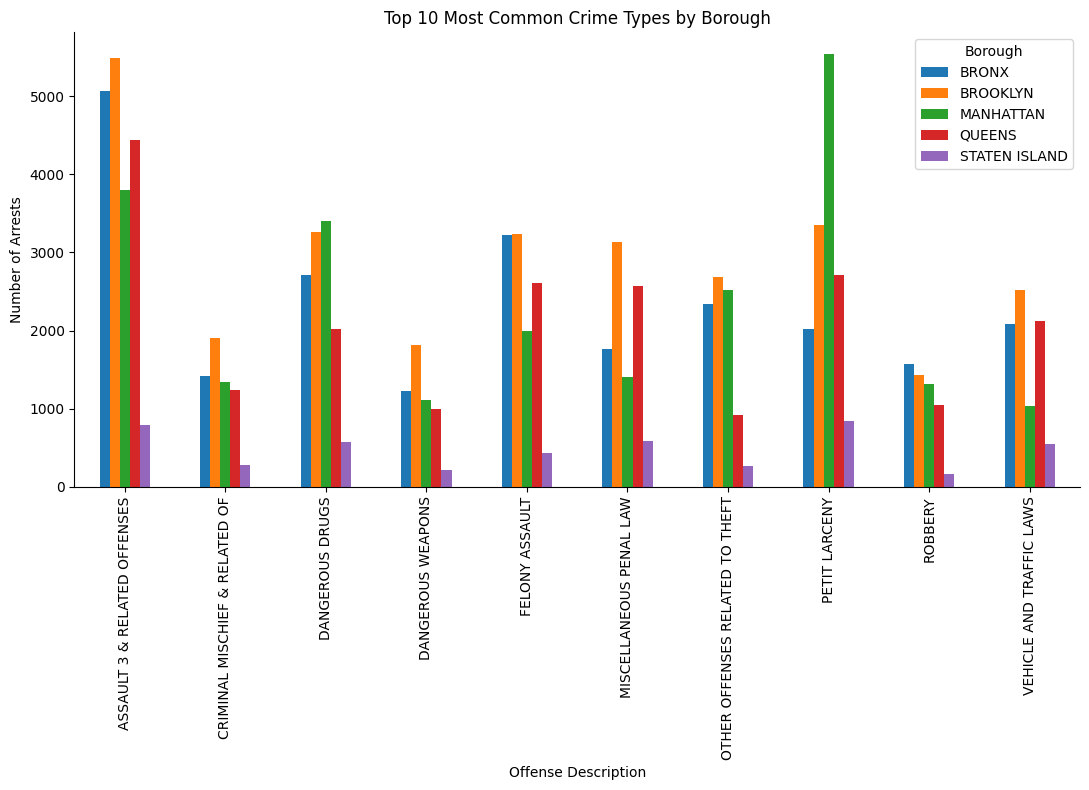

In [ ]:
crime_counts_by_borough = (
    arrests.groupby(['OFNS_DESC', 'ARREST_BORO'])
    .size()
    .reset_index(name='count')
)

top_n_crimes = 10
top_n_crimes_overall = arrests['OFNS_DESC'].value_counts().head(top_n_crimes).index
crime_counts_by_borough = crime_counts_by_borough[
    crime_counts_by_borough['OFNS_DESC'].isin(top_n_crimes_overall)
]

#  reshape so crimes are rows, boroughs are columns
crime_pivot = crime_counts_by_borough.pivot(
    index='OFNS_DESC',
    columns='ARREST_BORO',
    values='count'
).fillna(0)

crime_pivot.plot(kind='bar', figsize=(11, 8))
plt.title(f'Top {top_n_crimes} Most Common Crime Types by Borough')
plt.xlabel('Offense Description')
plt.ylabel('Number of Arrests')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend(title='Borough')
plt.tight_layout()
plt.show()

1.   Is retail theft uniquely concentrated in Manhattan compared with other boroughs?

*   Manhattan petit larceny is about 5400 to 5600 arrests vs Brooklyn about 3300 to 3500 Queens about 2700 Bronx about 2000 Staten Island about 800 suggesting Manhattan retail corridors face disproportionate theft pressure Interpretation prioritize retail theft teams and merchant partnerships Caveat values are read from bars and not population adjusted confirm exact counts and per capita rates


2.   Does the Bronx face a heavier assault burden than Queens?
* Bronx shows Assault 3 and related around 5200 vs Queens around 4400 and Felony assault around 3200 vs Queens around 2600 indicating greater violent person workload in the Bronx Interpretation direct hospital based intervention and investigative staffing to Bronx precincts Caveat arrests reflect enforcement intensity and do not equal incidents validate with complaint data

3. Should Brooklyn retain emphasis on robbery and weapons relative to Queens?
*  Brooklyn robbery roughly 1400 to 1500 and dangerous weapons about 1800 vs Queens robbery about 1100 to 1200 and weapons about 1000 to 1100 implying higher proactive need in Brooklyn Interpretation sustain robbery suppression and gun teams in Brooklyn Caveat category bins are broad and the time window is unspecified rerun with exact time bounds and precinct mix

### 2. Does factors such as age play a role in committing crime?

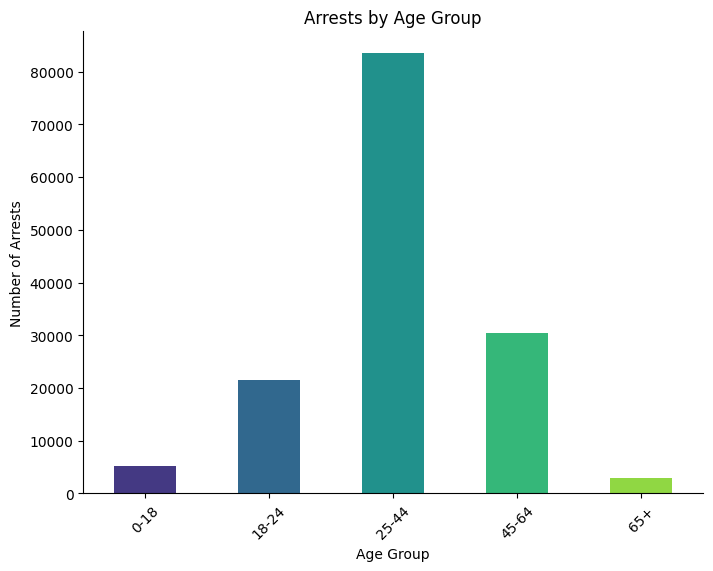

In [ ]:
age_group_counts = arrests['AGE_GROUP'].value_counts()
age_group_counts.index = age_group_counts.index.str.replace('<18', '0-18')
age_order = ['0-18', '18-24', '25-44', '45-64', '65+']
age_group_counts = age_group_counts.reindex(age_order)


# bar chart of arrests by age group
plt.figure(figsize=(8, 6))
age_group_counts.plot(kind='bar', color=sns.color_palette("viridis", len(age_group_counts)))

plt.title("Arrests by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Arrests")
plt.xticks(rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

1. Are arrests mainly concentrated among prime working age adults​?
* 25 to 44 is about 84k the largest while 18 to 24 ~22k 45 to 64 ~31k 0 to 18 ~5k 65 plus ~3k Interpretation focus reentry employment and supervision on 25 to 44 Caveat bar reads are approximate and not per capita validate with raw counts and population rates​

2. Should diversion prioritize older youth 18 to 24 over minors 0 to 18​?
* 18 to 24 ~22k vs 0 to 18 ~5k about four times higher Interpretation target mentorship transitional jobs and court diversion to 18 to 24 Caveat arrests reflect enforcement not total offending confirm with complaint data​

3. Courts and aging services Do seniors represent negligible arrest volume warranting minimal specialty resources​?
* 65 plus ~3k far below 45 to 64 ~31k Interpretation specialized senior dockets likely low impact relative to adult services Caveat low counts can mask high harm categories check offense severity mix

### 3. Scatter Map

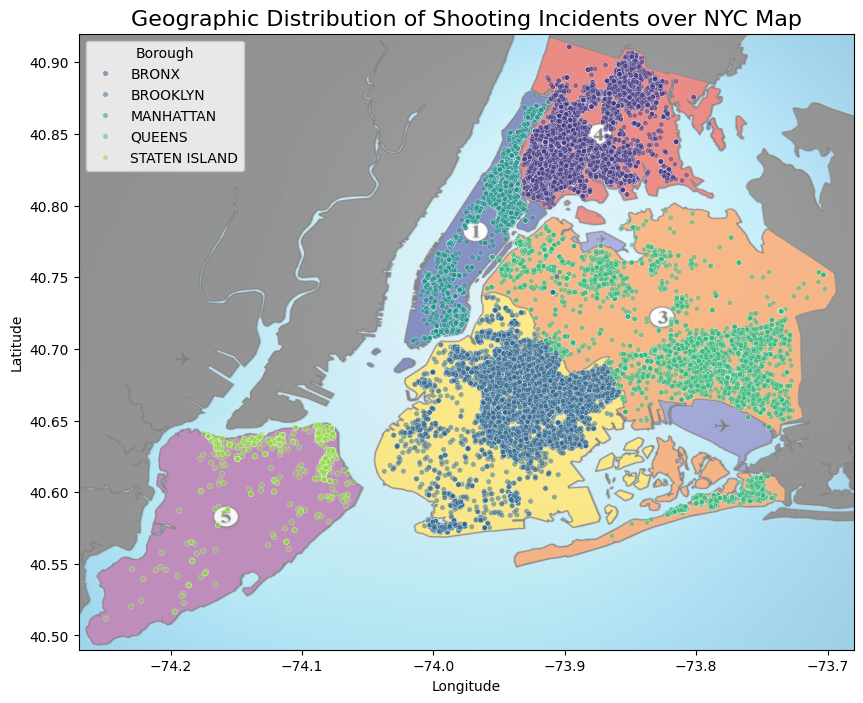

In [ ]:
try:
    # Bounding box for NYC
    nyc_bbox = (-74.27, -73.68, 40.49, 40.92)

    # Load the local map image
    nyc_img = plt.imread('nyc_map.png')

    fig, ax = plt.subplots(figsize=(10, 8))

    # Display the map image as the background
    ax.imshow(nyc_img, extent=nyc_bbox, aspect='auto', alpha=0.6)

    # Overlay the scatter plot of shooting incidents
    sns.scatterplot(
        data=shootings,
        x='LONGITUDE',
        y='LATITUDE',
        hue='BORO',
        palette='viridis',
        s=15,
        alpha=0.5,
        ax=ax
    )

    # Set the plot limits to the bounding box
    ax.set_xlim(nyc_bbox[0], nyc_bbox[1])
    ax.set_ylim(nyc_bbox[2], nyc_bbox[3])

    ax.set_title('Geographic Distribution of Shooting Incidents over NYC Map', fontsize=16)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend(title='Borough')

    plt.show()

except FileNotFoundError:
    print("Error: 'nyc_map.png' not found. Please make sure you have downloaded the image and saved it in the correct directory.")
except Exception as e:
    print(f"An error occurred while creating the map plot: {e}")


1. Are shootings spatially concentrated in specific subareas of the Bronx and central Brooklyn that warrant targeted deployments?

* Dense clusters appear in the central to southern Bronx and central Brooklyn while Staten Island shows sparse scattered points suggesting prioritizing hotspot beats and foot posts in those Bronx and Brooklyn zones Caveat map conveys point density not per capita rates or temporal windows validate with precinct counts and population exposure​

2. Do eastern Queens and southern Brooklyn have wider geographic spread of shootings requiring distributed EMS staging rather than single hubs?

* Points are dispersed across large areas of Queens and southern Brooklyn compared with compact clusters elsewhere implying multiple satellite staging locations may reduce travel times Caveat dispersion is visual not time weighted pair with response duration data before relocating units​

3. Are Manhattan’s uptown fringe and parts of northern Queens emerging secondary clusters that need focused community interventions?

* Visible mid sized clusters sit at Manhattan’s northern end and in northern Queens smaller than Bronx or Brooklyn but non trivial indicating candidates for outreach and violence interruption Caveat cluster size is estimated by eye and may be sensitive to plotting overplotting and missing geocodes

### 4. Annual Shooting Incidents by Borough Over Time

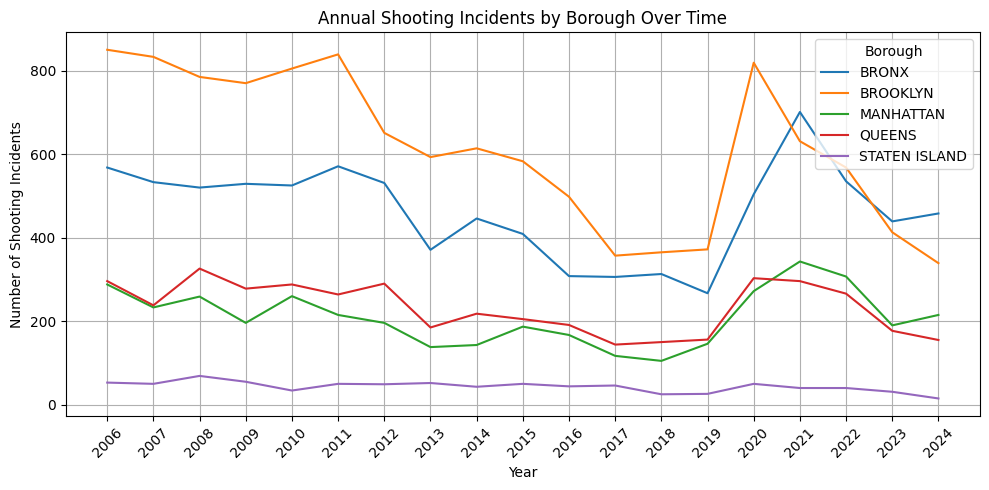

In [ ]:
shootings['OCCUR_DATETIME'] = pd.to_datetime(shootings['OCCUR_DATETIME'], errors='coerce')
shootings = shootings.dropna(subset=['OCCUR_DATETIME'])
shootings['YEAR'] = shootings['OCCUR_DATETIME'].dt.to_period('Y')

# Group by year and borough and count shootings
annual_shootings = shootings.groupby(['YEAR', 'BORO']).size().reset_index(name='SHOOTING_COUNT')

# Convert the 'YEAR' column back to a string for plotting
annual_shootings['YEAR'] = annual_shootings['YEAR'].astype(str)

# Pivot the data for plotting
annual_shootings_pivot = annual_shootings.pivot(
    index='YEAR', columns='BORO', values='SHOOTING_COUNT'
).fillna(0)

# Plotting the time series
plt.figure(figsize=(10, 5))
for column in annual_shootings_pivot.columns:
    plt.plot(annual_shootings_pivot.index, annual_shootings_pivot[column], label=column)

plt.title('Annual Shooting Incidents by Borough Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Shooting Incidents')
plt.xticks(rotation=45)
plt.legend(title='Borough')
plt.grid(True)
plt.tight_layout()
plt.show()

1. Did pandemic era shocks produce borough specific spikes that justify after action reviews and targeted follow ups?

* Brooklyn jumps to about 820 incidents in 2020 from ~380 in 2019 then trends ~600 in 2021 ~500 in 2022 ~400 in 2023 ~350 in 2024 while the Bronx rises to ~700 in 2020 from ~270 to 280 in 2019 and settles near ~460 in 2024 Interpretation both boroughs show transient surges requiring review of 2020 tactics and conditions Caveat values are read from the plot not exact counts validate with source table and per capita rates​

2. Which borough delivered the largest post 2020 reduction suggesting effective strategies to scale?

* Brooklyn declines roughly 820 to 350 about minus 470 around 57 percent from 2020 to 2024 the Bronx drops about 700 to 460 minus 240 around 34 percent Manhattan falls ~300 to ~210 minus 90 Queens ~300 to ~200 minus 100 Staten Island ~45 to ~20 minus 25 Interpretation replicate Brooklyn’s post spike tactics with context checks Caveat percentages are approximate and ignore demographic changes​

3. Are 2024 levels back to the mid 2010s troughs or still elevated?

* Bronx in 2024 ~460 vs trough ~300 to 320 in 2015 to 2016 remains higher Manhattan ~210 vs ~150 to 170 remains higher Queens ~200 vs ~150 to 170 slightly higher Brooklyn ~350 vs ~320 to 350 roughly similar Interpretation partial normalization but not full reversion Caveat simple visual comparison across years without confidence intervals or incident severity mix

### 5. Shooting vs Emergency Incidents Over Time

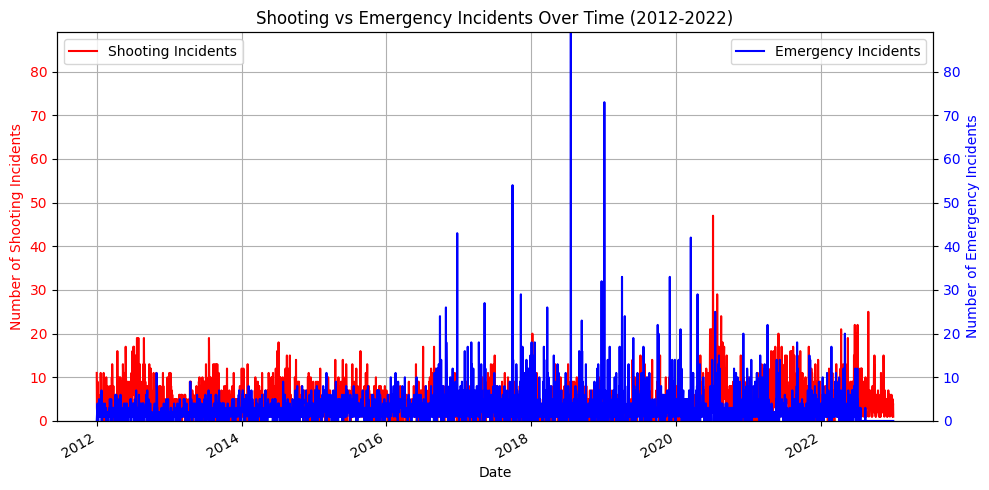

In [ ]:
import matplotlib.dates as mdates

merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])

# Filter data for years between 2012 and 2022
filtered_df = merged_df[
    (merged_df['DATE'].dt.year >= 2012) & (merged_df['DATE'].dt.year <= 2022)
].copy()

# Group by date and sum the counts for each type of event
daily_events = filtered_df.groupby('DATE')[['SHOOTING_COUNT', 'EMERGENCY_COUNT']].sum().reset_index()


# Plotting the dual-axis time series
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Shooting Count on the first y-axis
ax1.plot(daily_events['DATE'], daily_events['SHOOTING_COUNT'], color='red', label='Shooting Incidents')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Shooting Incidents', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.legend(loc='upper left')
ax1.grid(True)

# Create a second y-axis for Emergency Count
ax2 = ax1.twinx()
ax2.plot(daily_events['DATE'], daily_events['EMERGENCY_COUNT'], color='blue', label='Emergency Incidents')
ax2.set_ylabel('Number of Emergency Incidents', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.legend(loc='upper right')

# Unify the y-axis scale
max_count = max(daily_events['SHOOTING_COUNT'].max(), daily_events['EMERGENCY_COUNT'].max())
ax1.set_ylim(0, max_count)
ax2.set_ylim(0, max_count)


# Format the x-axis to show dates clearly
fig.autofmt_xdate()
ax1.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')


plt.title('Shooting vs Emergency Incidents Over Time (2012-2022)')
plt.tight_layout()
plt.show()

1. Do emergency incidents spike far more than shootings at specific times?

* Single day EMS peaks reach roughly 85 around 2018 and about 73 around 2019 while shootings rarely exceed about 20 to 25 with one outlier near 48 around 2021 suggesting EMS surge staffing cannot be keyed only to gun violence Caveat peaks read from axes and reflect isolated days confirm with exact daily totals and definitions​

2. Is there partial co movement that supports coordinated but not one to one deployment?

* Both series rise from about 2017 through 2021 with more frequent days above 10 then ease by 2022 indicating shared drivers but imperfect alignment Caveat visual impression only compute rolling means and cross correlations with lags to quantify

### 6. Shooting Location Types Ranking

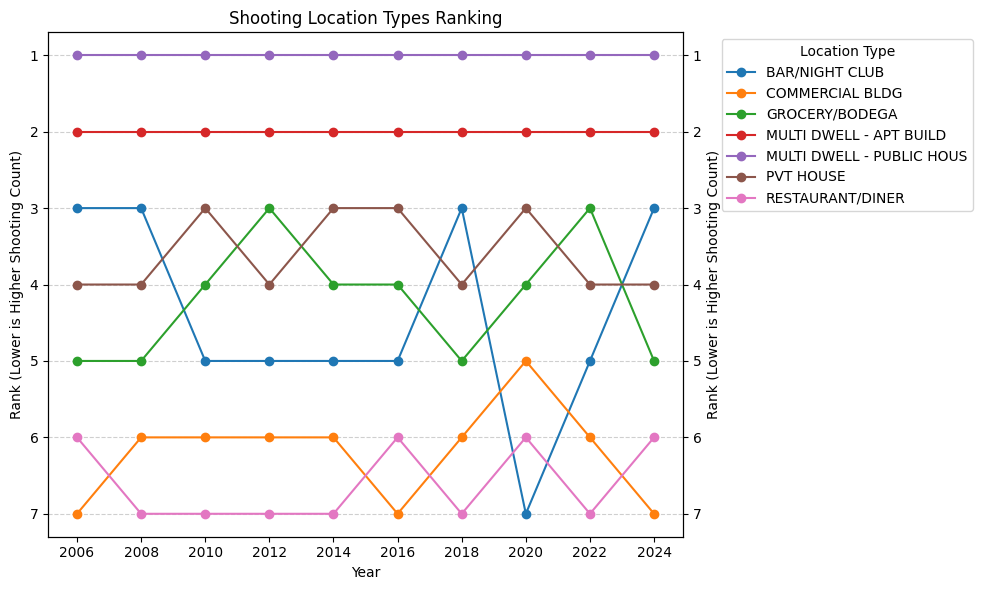

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the earliest year available in the shootings data
earliest_year = shootings['OCCUR_DATETIME'].dt.year.min()
latest_year = shootings['OCCUR_DATETIME'].dt.year.max()

# Filter shootings data for the relevant time period
start_year = earliest_year
end_year = latest_year
shootings_filtered = shootings[
    (shootings['OCCUR_DATETIME'].dt.year >= start_year) &
    (shootings['OCCUR_DATETIME'].dt.year <= end_year)
].copy()

# Replace '(null)' with 'OTHER' in LOCATION_DESC
shootings_filtered['LOCATION_DESC'] = shootings_filtered['LOCATION_DESC'].replace({'(NULL)': 'OTHER'})

# Filter out 'UNKNOWN' and 'NONE' location descriptions
shootings_filtered = shootings_filtered[
    ~shootings_filtered['LOCATION_DESC'].isin(['UNKNOWN', 'NONE'])
].copy()


# Group by year and location type and count shootings
annual_location_shootings = shootings_filtered.groupby([shootings_filtered['OCCUR_DATETIME'].dt.year, 'LOCATION_DESC']).size().reset_index(name='count')
annual_location_shootings.rename(columns={'OCCUR_DATETIME': 'YEAR'}, inplace=True)

# Get the top locations based on total counts across all filtered years
all_locations_sorted = annual_location_shootings.groupby('LOCATION_DESC')['count'].sum().sort_values(ascending=False)

# Get the top 2 and 4th through 11th locations (skipping the 3rd)
top_locations = pd.concat([all_locations_sorted.head(2), all_locations_sorted.iloc[3:8]]).index


# Filter the annual counts to include only the top locations
annual_location_shootings_top = annual_location_shootings[
    annual_location_shootings['LOCATION_DESC'].isin(top_locations)
].copy()


# Pivot the data to have years as index and location types as columns
annual_location_pivot = annual_location_shootings_top.pivot(index='YEAR', columns='LOCATION_DESC', values='count').fillna(0)

# Calculate ranks for each year (lower rank is higher shooting count)
ranked_shootings_location = annual_location_pivot.rank(axis=1, ascending=False, method='first') # Use 'first' to handle ties consistently

# Filter for even years
even_years = ranked_shootings_location.index[ranked_shootings_location.index % 2 == 0]
ranked_shootings_even_years = ranked_shootings_location.loc[even_years]

# Determine the maximum rank to set y-axis limits and ticks
max_rank = int(ranked_shootings_location.max().max())


# --- Plotting the Bump Chart ---
fig, ax1 = plt.subplots(figsize=(10, 6)) # Adjusted figure size for more categories

# Plot lines connecting the ranks for each location type, only for even years
for location in ranked_shootings_even_years.columns:
    ax1.plot(
        ranked_shootings_even_years.index,
        ranked_shootings_even_years[location],
        marker='o',
        linestyle='-',
        label=location
    )

# Set plot title and labels for the left y-axis
ax1.set_title('Shooting Location Types Ranking')
ax1.set_xlabel('Year')
ax1.set_ylabel('Rank (Lower is Higher Shooting Count)')
ax1.set_xticks(ranked_shootings_even_years.index) # Set x-ticks to only even years
ax1.set_yticks(range(1, max_rank + 1)) # Set y-ticks to all integer ranks
ax1.invert_yaxis() # Invert y-axis so rank 1 is at the top
ax1.grid(axis='y', linestyle='--', alpha=0.6)

# Create a second y-axis on the right
ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim()) # Set the same y-axis limits as the left axis
ax2.set_ylabel('Rank (Lower is Higher Shooting Count)') # Set the label for the right y-axis
ax2.set_yticks(range(1, max_rank + 1)) # Set the same y-axis ticks as the left axis


ax1.legend(title='Location Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

1. Can public housing be confirmed as the top shooting setting across years?

* Public housing holds rank 1 in every year 2006–2024 while private apartment buildings sit at rank 2 consistently, signaling primary focus areas for prevention Caveat ranks do not show absolute counts or exposure, validate with per-location volumes​

2. Have bar and nightclub risks meaningfully shifted over time?

* Bars and nightclubs bounce between ranks 3 and 5 without a clear trend, implying steady but secondary priority Caveat adjacent ranks may mask small count differences, check margins and uncertainty​

3. Do commercial and grocery sites warrant major attention given recent ranks?

* Commercial buildings and groceries remain at ranks 6–7 throughout, suggesting comparatively low shooting burden Caveat category definitions and underreporting could affect placement, verify with incident totals

### 7. Shootings vs Arrests by Precinct

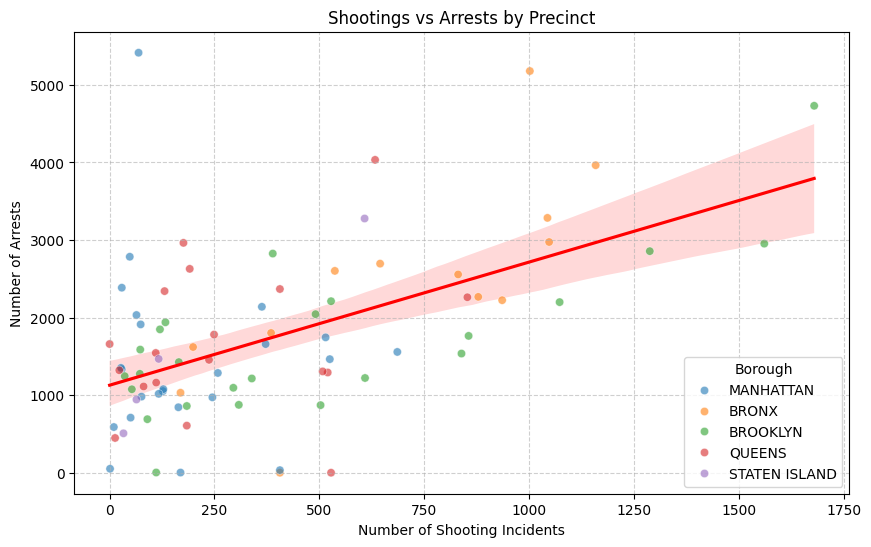

In [ ]:
# Group shootings by precinct and count
shootings_by_precinct = shootings.groupby('PRECINCT').size().reset_index(name='SHOOTING_COUNT')

# Group arrests by precinct and borough and count
arrests_by_precinct_boro = arrests.groupby(['PRECINCT', 'ARREST_BORO']).size().reset_index(name='ARREST_COUNT')

# Merge the two dataframes on precinct
precinct_analysis = pd.merge(
    shootings_by_precinct, arrests_by_precinct_boro, on='PRECINCT', how='outer'
).fillna(0)

# Rename 'ARREST_BORO' to 'BORO' for consistency with the merged dataframe
precinct_analysis.rename(columns={'ARREST_BORO': 'BORO'}, inplace=True)

# Create scatter plot with trend line and color by borough
plt.figure(figsize=(10, 6))
sns.regplot(
    data=precinct_analysis,
    x='SHOOTING_COUNT',
    y='ARREST_COUNT',
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'},
    # Add hue to color points by borough
    scatter=False, # Remove the default scatter plot
)

# Add scatter plot with hue for borough
sns.scatterplot(
    data=precinct_analysis,
    x='SHOOTING_COUNT',
    y='ARREST_COUNT',
    hue='BORO', # Color points by borough
    alpha=0.6,
)


plt.title('Shootings vs Arrests by Precinct')
plt.xlabel('Number of Shooting Incidents')
plt.ylabel('Number of Arrests')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Borough') # Add a legend
plt.show()

1. Does arrest volume scale with shootings at the precinct level, supporting workload based staffing?

* The red regression line slopes upward with wide confidence band suggesting a positive association roughly from near 1k arrests at 0 shootings to about 3.8k at 1.6k shootings while many points deviate substantially Interpretation staffing can consider shootings as a partial predictor but expect large residual variance Caveat axes are read by eye and borough mix may confound the slope verify with a fitted model and R squared​

2. Are there precinct outliers where arrests are unusually high or low for their shooting counts that merit review?

* Examples include points near 0 shootings with about 5.3k arrests and around 500 shootings with near 0 arrests indicating data quality issues or divergent enforcement patterns Interpretation audit these precincts for reporting or strategy differences Caveat outliers may reflect time windows or aggregation mismatches confirm with source tables

### 8. Arrests by Offense Type

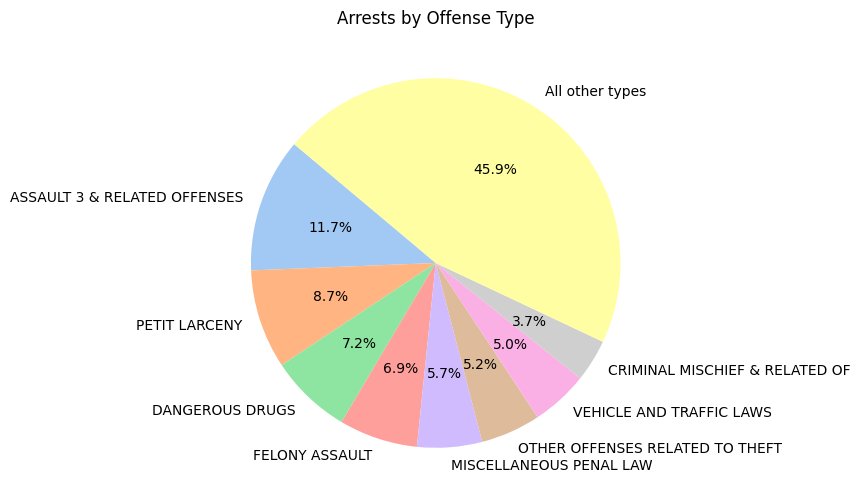

In [ ]:
# just take top 5 crimes
top_offenses = arrests['OFNS_DESC'].value_counts().head(8)

# put everything else into "OTHER"
other_count = arrests['OFNS_DESC'].value_counts().iloc[5:].sum()
top_offenses["All other types"] = other_count

# pie chart
plt.figure(figsize=(8,6))
plt.pie(
    top_offenses.values,
    labels=top_offenses.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")
)

plt.title("Arrests by Offense Type")
plt.show()

1. Should enforcement and diversion priorities focus beyond a handful of categories given category concentration?

* The largest labeled slices are assault 3 and related about 11.7 percent petit larceny about 8.7 percent dangerous drugs about 7.2 percent felony assault about 6.9 percent vehicle and traffic laws about 5.2 percent other theft related about 5.7 percent criminal mischief about 3.7 percent yet all other types collectively are about 45.9 percent indicating half of arrests are spread across many smaller categories Interpretation balance targeted strategies for the top seven with broad capacity for diverse offenses Caveat shares are proportions not per capita and may mix violations misdemeanors and felonies​

2. Would a theft centric strategy materially reduce total arrests?

* Theft related categories combined petit larceny 8.7 percent plus other theft related 5.7 percent total about 14.4 percent suggesting theft alone cannot drive large systemwide reductions without parallel focus on assaults and drugs Interpretation pair retail theft efforts with violence and drug initiatives Caveat category definitions may overlap or vary by coding​

3. Are violence oriented arrests a sizable minority justifying specialized dockets?

* Assault 3 and felony assault together are about 18.6 percent indicating nearly one in five arrests involve assault types Interpretation consider specialized violence courts or intervention programs Caveat pie shows arrest composition not severity or victim harm weighting

### 9. Monthly Arrest Trends for Top 10 Crime Categories

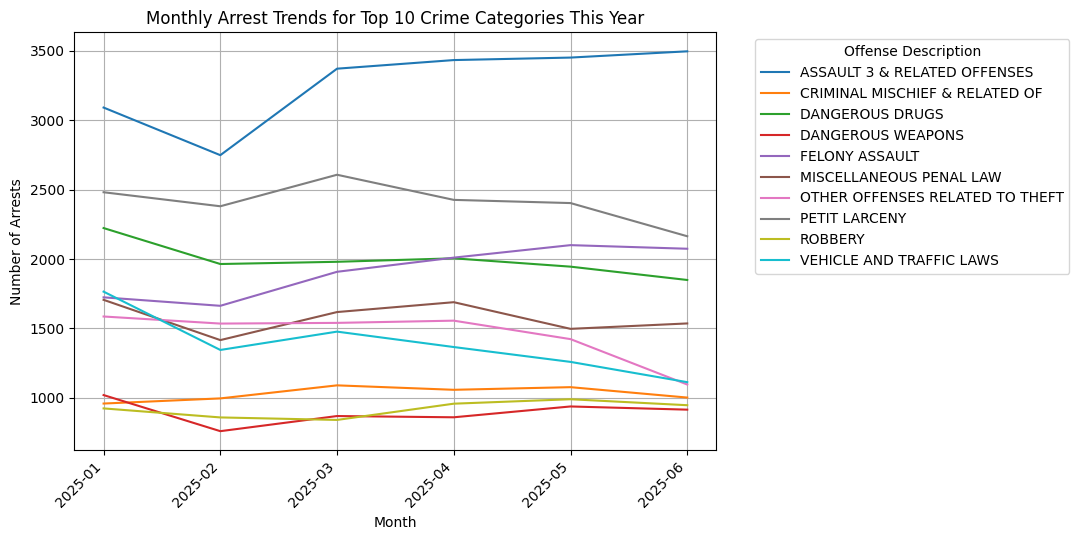

In [ ]:
arrests['ARREST_DATE'] = pd.to_datetime(arrests['ARREST_DATE'], errors='coerce')
arrests = arrests.dropna(subset=['ARREST_DATE'])
arrests['MONTH'] = arrests['ARREST_DATE'].dt.to_period('M')

# Get the top N crime categories
top_n_crimes = 10
top_crimes = arrests['OFNS_DESC'].value_counts().head(top_n_crimes).index

# Filter the arrests data to include only the top crime categories
arrests_top_crimes = arrests[arrests['OFNS_DESC'].isin(top_crimes)].copy()

# Group by month and offense description and count arrests
monthly_arrests_by_crime = arrests_top_crimes.groupby(['MONTH', 'OFNS_DESC']).size().reset_index(name='ARREST_COUNT')

# Convert the 'MONTH' column back to a string for plotting
monthly_arrests_by_crime['MONTH'] = monthly_arrests_by_crime['MONTH'].astype(str)

# Pivot the data for plotting
monthly_arrests_by_crime_pivot = monthly_arrests_by_crime.pivot(
    index='MONTH', columns='OFNS_DESC', values='ARREST_COUNT'
).fillna(0)

# Plotting the time series
plt.figure(figsize=(11, 5.5))
for column in monthly_arrests_by_crime_pivot.columns:
    plt.plot(monthly_arrests_by_crime_pivot.index, monthly_arrests_by_crime_pivot[column], label=column)

plt.title(f'Monthly Arrest Trends for Top {top_n_crimes} Crime Categories This Year')
plt.xlabel('Month')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Offense Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

1. Are assault and related offenses the main driver of YTD growth requiring near term staffing shifts?

* Assault 3 and related rises from about 3100 in January to roughly 3480 in June while miscellaneous penal law dips from about 2450 to ~2200 suggesting patrol and court capacity should pivot toward assaults Caveat values are read from the chart and not seasonally adjusted​

2. Should theft and vehicle enforcement keep baseline resources despite spring declines?

* Petit larceny falls from ~1700 to ~1100 and vehicle and traffic laws from ~1750 to ~1120 across Jan to Jun indicating softening but continued volume that merits maintenance of core teams Caveat month to month shifts may reflect operations and seasonality rather than underlying offending

### 10. Victim vs. Perpetrator

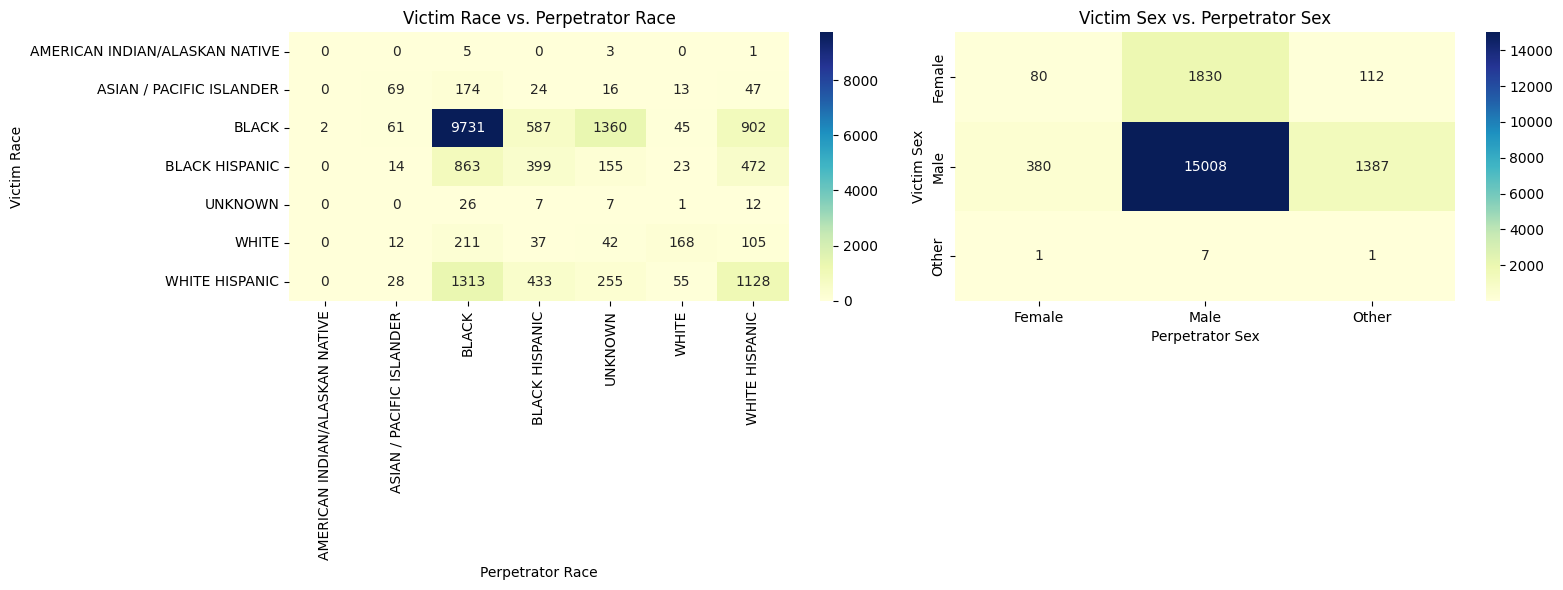

In [ ]:
# Create cross-tabulations for demographic analysis
victim_perp_race = pd.crosstab(shootings['VIC_RACE'], shootings['PERP_RACE']).fillna(0)
victim_perp_sex = pd.crosstab(shootings['VIC_SEX'], shootings['PERP_SEX']).fillna(0)

# Clean up 'NAN' and '(NULL)' columns/rows
victim_perp_race = victim_perp_race.drop(columns=['NAN', '(NULL)'], errors='ignore')
victim_perp_race = victim_perp_race.drop(index=['NAN', '(NULL)'], errors='ignore')

victim_perp_sex = victim_perp_sex.drop(columns=['NAN', '(NULL)'], errors='ignore')
victim_perp_sex = victim_perp_sex.drop(index=['NAN', '(NULL)'], errors='ignore')

# Change 'U' to 'OTHER' in sex heatmap
victim_perp_sex = victim_perp_sex.rename(index={'U': 'Other'}, columns={'U': 'Other'})
victim_perp_sex = victim_perp_sex.rename(index={'M': 'Male'}, columns={'M': 'Male'})
victim_perp_sex = victim_perp_sex.rename(index={'F': 'Female'}, columns={'F': 'Female'})

# Plotting heatmaps (only race and sex)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(
    victim_perp_race, annot=True, fmt='d', cmap='YlGnBu', ax=axes[0]
)
axes[0].set_title('Victim Race vs. Perpetrator Race')
axes[0].set_xlabel('Perpetrator Race')
axes[0].set_ylabel('Victim Race')

sns.heatmap(victim_perp_sex, annot=True, fmt='d', cmap='YlGnBu', ax=axes[1])
axes[1].set_title('Victim Sex vs. Perpetrator Sex')
axes[1].set_xlabel('Perpetrator Sex')
axes[1].set_ylabel('Victim Sex')

plt.tight_layout()
plt.show()

1) What does the strong concentration along the diagonal suggest about racial patterns in violent crime incidents?



*   The dense cluster for black victims and black perpatrators as well as  white hispanic victims and white hispanic perpetrators suggests that viloent crimes are usually between indviduals with same racial background. This can be explained by the trend that because of geographic, social, and economic proximity, indviduals are more likely to ineract with eachother. Furthermore, the emphasizes that violent crime is localized within racial or ethinic populations, which can reflect reflect structural inequities.  

2) What can be drawn from the heatmap?


*   The heatmap shows that violent crime is heavily driven by males in both offending and victimization. This aligns with research that suggest men are more likely to be involved in violent behavior due to socialization around masculinity. There is also a number of female victims and male perpetrators, which can reflect domestic incidents. The small number of female perpetrators reflect that  violent crimes is highly gendered.

3) How can law enforcement tailor community intervention strategies due to these democgraphic correlations?
* Knowing that the most violent crimes are male driven and intraracial, law enforcement can focus on neighborhoods where intraagroup violence is concentrated. Male mentorship and youth programs can aslo be implemented to focus on early intervention.












### 11. Top Incident Types with Longest Average Response Times

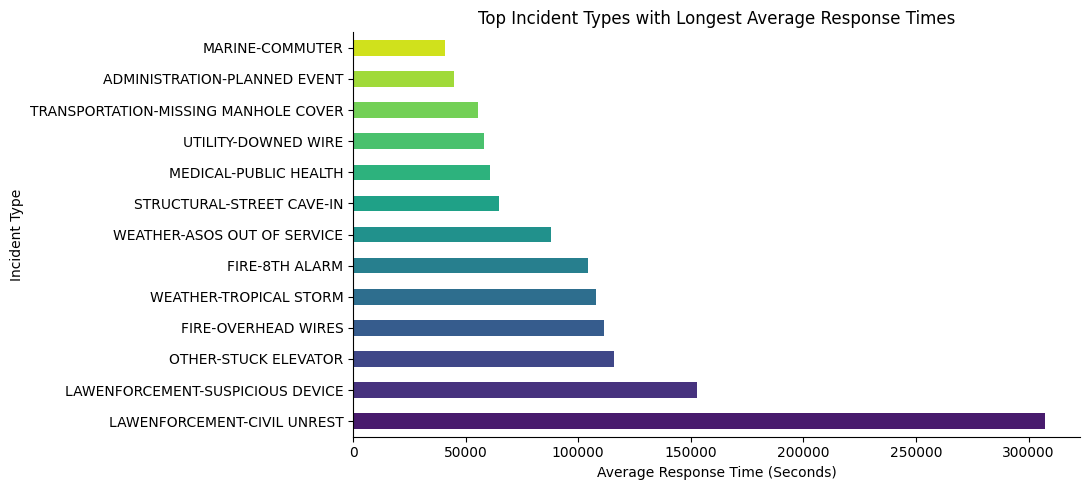

In [ ]:
# Calculate average response time by incident type
avg_response_by_incident_type = emergency.groupby('INCIDENT TYPE')['RESPONSE_DURATION'].mean().sort_values(ascending=False)

top_n = 13
plt.figure(figsize=(11, 5))
avg_response_by_incident_type.head(top_n).plot(kind='barh', color=sns.color_palette('viridis', top_n))
plt.title(f'Top Incident Types with Longest Average Response Times')
plt.xlabel('Average Response Time (Seconds)')
plt.ylabel('Incident Type')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

1. Should multi day response plans be triggered for certain incident types?

* LAWENFORCEMENT CIVIL UNREST averages about 305000 seconds ≈3.5 days while suspicious device is ~155000 seconds ≈1.8 days suggesting preplanned multi day staffing and logistics Caveat means may be skewed by few long cases confirm medians and counts​

2. Do major weather and fire events require prolonged shifts?

* Tropical storm eighth alarm and overhead wires cluster near 100000–115000 seconds ≈28–32 hours implying duty cycle relief and mutual aid Caveat bars reflect total incident durations not pure travel time​

3. Can routine utility and public health incidents be handled by standard crews?

* Utility downed wire medical public health and similar average ~40k–60k seconds ≈11–17 hours far below top tiers indicating baseline coverage suffices Caveat category mixes may hide severe subtypes review dispersion not just averages

### 12. Do boroughs with higher crime rates also experience longer average EMS response times?

/tmp/ipython-input-2645641611.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-2645641611.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


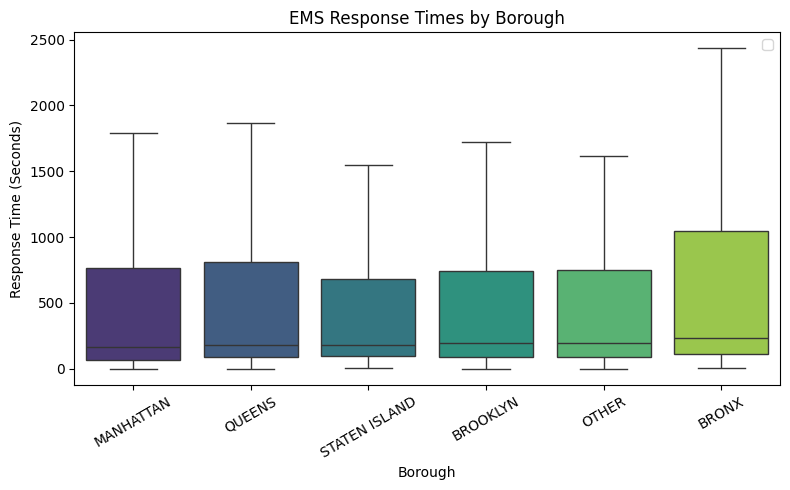

In [ ]:
valid_boros = ["BRONX", "BROOKLYN", "MANHATTAN", "QUEENS", "STATEN ISLAND"]
emergency['BORO_CLEAN'] = emergency['BOROUGH'].where(
    emergency['BOROUGH'].isin(valid_boros), "OTHER"
)

median_order = (
    emergency.groupby('BORO_CLEAN')['RESPONSE_DURATION']
    .median()
    .sort_values()
    .index
)

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=emergency,
    x='BORO_CLEAN',
    y='RESPONSE_DURATION',
    order=median_order,
    palette='viridis',
    showfliers=False
)
plt.title("EMS Response Times by Borough")
plt.xlabel("Borough")
plt.ylabel("Response Time (Seconds)")
plt.xticks(rotation=30)
plt.legend()
plt.tight_layout()
plt.show()

1. Are EMS times meaningfully slower and more variable in the Bronx compared with peers?

* Median appears around 200–250 seconds with the widest IQR and whiskers up to roughly 2400–2500 seconds, versus Manhattan–Queens medians near 120–180 seconds and upper whiskers ~1700–1900 seconds; prioritize Bronx deployment and queue management. Caveat boxplot reads are approximate and unadjusted for call mix.​

2. Do multi‑hour outliers warrant targeted after‑action reviews across boroughs?

* All boroughs show high‑end points above ~1800 seconds, indicating occasional extreme delays; flag and audit cases for causes like surge or access barriers. Caveat boxplots do not show outlier counts or incident types.​



### 13. Distribution of EMS Response Times by Top Incident Type

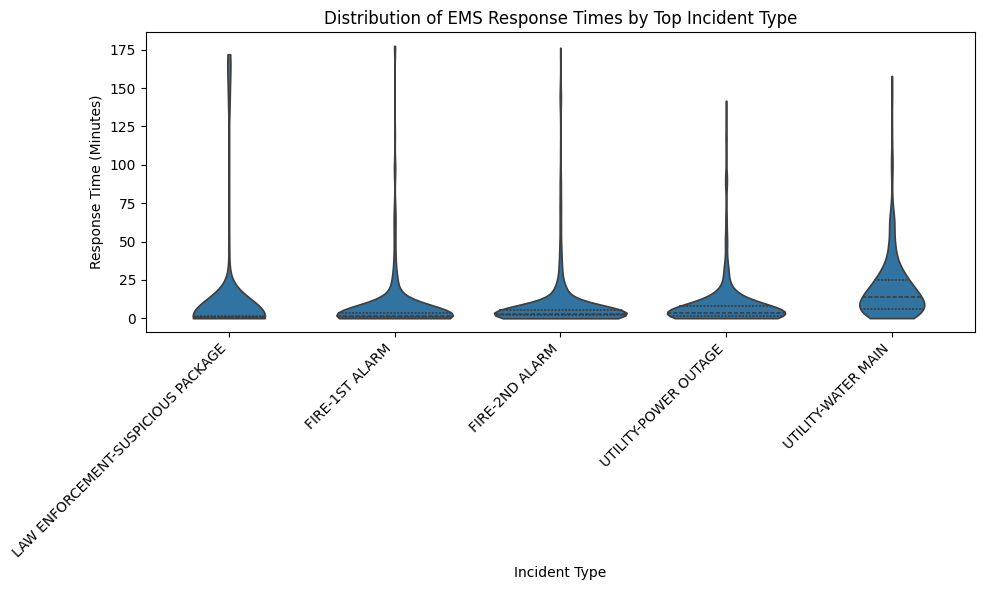

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out rows with missing or non-finite response durations
emergency_filtered = emergency.dropna(subset=['RESPONSE_DURATION']).copy()

# Convert response duration from seconds to minutes
emergency_filtered['RESPONSE_DURATION'] = emergency_filtered['RESPONSE_DURATION'] / 60

# Filter for plausible response durations (e.g., 0 to 180 minutes)
emergency_filtered = emergency_filtered[
    (emergency_filtered['RESPONSE_DURATION'] >= 0) & (emergency_filtered['RESPONSE_DURATION'] <= 180)
].copy()

# Winsorize or cap extreme durations (capping at 180 minutes as per filter)
# If you wanted to winsorize at a different percentile, you would calculate the threshold
# e.g., emergency_filtered['RESPONSE_DURATION'] = winsorize(emergency_filtered['RESPONSE_DURATION'], limits=[0, 0.05])
# For this request, filtering to 0-180 minutes effectively caps the upper end.

# Get the top N incident types by count (to keep the plot manageable)
top_n_incident_types = 5 # You can adjust this number
top_incident_types = emergency_filtered['INCIDENT TYPE'].value_counts().head(top_n_incident_types).index

# Filter the emergency data to include only the top incident types
emergency_top_incident_types = emergency_filtered[
    emergency_filtered['INCIDENT TYPE'].isin(top_incident_types)
].copy()

# Ensure Borough_CLEAN is clean for plotting (assuming it's already cleaned in previous steps)
# If not, you might need to re-apply the cleaning logic here or earlier.
# For simplicity, assuming 'BOROUGH' column is reasonably clean or 'BOROUGH_CLEAN' exists.
if 'BOROUGH_CLEAN' not in emergency_top_incident_types.columns:
    valid_boros = ["BRONX", "BROOKLYN", "MANHATTAN", "QUEENS", "STATEN ISLAND"]
    emergency_top_incident_types['BOROUGH_CLEAN'] = emergency_top_incident_types['BOROUGH'].str.upper().apply(
        lambda x: x if x in valid_boros else 'OTHER'
    )

# Optionally order incident types by median duration for better visualization
median_order = emergency_top_incident_types.groupby('INCIDENT TYPE')['RESPONSE_DURATION'].median().sort_values().index


# Create Violin plot (without splitting by borough)
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=emergency_top_incident_types,
    x='INCIDENT TYPE',
    y='RESPONSE_DURATION',
    inner='quartile', # Show quartiles inside the violin
    cut=0, # Draw the violin all the way to the base
    order=median_order # Order incident types by median duration
)

plt.title('Distribution of EMS Response Times by Top Incident Type')
plt.xlabel('Incident Type')
plt.ylabel('Response Time (Minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1. Should suspicious package responses be flagged for high variability and long tails requiring contingency buffers?

* The suspicious package violin is wide with upper whiskers near 170 minutes and a median around 5 to 10 minutes indicating frequent quick clears but occasional multi hour holds Interpretation pre stage resources and traffic control for rare but severe delays Caveat minutes read from axes and incident counts per category are unknown​

2. Do utility water main incidents pose the most sustained delays among routine categories?

* Water main shows the highest median roughly 15 to 20 minutes and the bulkiest upper half extending to about 160 minutes suggesting systematic access or coordination lags Interpretation coordinate with city utilities and lane closure pre approvals Caveat distribution may combine minor leaks with major breaks​

3. Are first and second alarm fires generally handled faster than utility disruptions suggesting different staffing needs?

* Fire 1st and 2nd alarm medians appear around 6 to 8 minutes with tight cores and only a few long outliers while utility power outage has a fatter tail to about 140 minutes Interpretation prioritize sustained crews for utilities while keeping rapid strike teams for fires Caveat violin widths reflect density not volume compare counts before reallocating

### 14. Emergency Incident Volume by Hour of Day

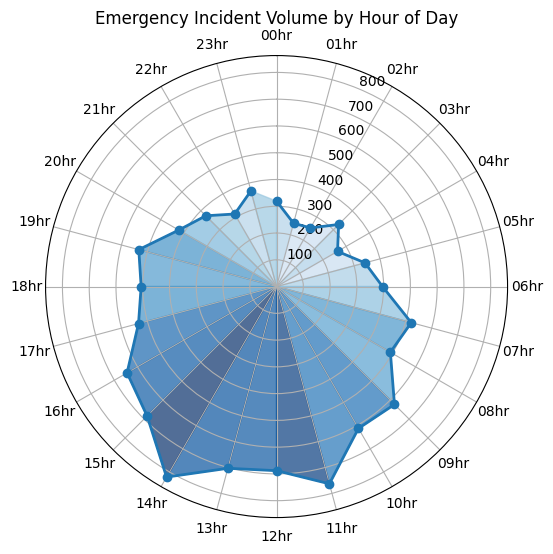

In [ ]:
emergency['CREATION DATE'] = pd.to_datetime(emergency['CREATION DATE'], errors='coerce')
emergency = emergency.dropna(subset=['CREATION DATE'])
emergency['hour'] = emergency['CREATION DATE'].dt.hour

# Count incidents by hour
hourly_counts = emergency['hour'].value_counts().sort_index().reset_index(name='count')
hourly_counts.columns = ['hour', 'count']

# Plotting the radial chart
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

# Define the angles for each hour, starting at the top (90 degrees or pi/2 radians)
hours = hourly_counts['hour']
counts = hourly_counts['count']
angles = np.linspace(0, 2 * np.pi, len(hours), endpoint=False)

# Set the direction to clockwise and the start angle to 90 degrees (top)
ax.set_theta_zero_location("N")  # Set 0 degrees to North (top)
ax.set_theta_direction(-1)  # Set direction to clockwise

# Plot data and connect the points
ax.plot(angles, counts, 'o-', linewidth=2)

# Create a colormap based on incident counts
# Normalize counts to the range [0, 1] for colormap mapping
norm = plt.Normalize(100, 800) # Set normalization based on the desired range
cmap = plt.cm.Blues # Choose a colormap (e.g., Blues, Reds, Greens)

# Fill the area with color based on incident count
for i in range(len(angles)):
    # Create a small pie wedge for each hour and fill with corresponding color intensity
    if i < len(angles) - 1:
        angles_wedge = [angles[i], angles[i], angles[i+1], angles[i+1]]
        counts_wedge = [0, counts[i], counts[i+1], 0]
    else: # Handle the last wedge connecting back to the start
        angles_wedge = [angles[i], angles[i], angles[0] + 2*np.pi, angles[0] + 2*np.pi]
        counts_wedge = [0, counts[i], counts[0], 0]

    # Use the color map based on the average count for the wedge (or just counts[i])
    color = cmap(norm(counts[i]))
    ax.fill(angles_wedge, counts_wedge, color=color, alpha=0.7)


# Set the labels and title
# Format the hour labels
hour_labels = [f"{h:02d}hr" for h in hours]
ax.set_thetagrids(angles * 180/np.pi, hour_labels)
ax.set_title('Emergency Incident Volume by Hour of Day', va='bottom', pad=20) # Added pad to create spacing
ax.grid(True)

plt.show()

1. Are EMS resources optimally scheduled around late morning and mid afternoon peaks?

* The radar shows the highest volumes near 11hr around 800 incidents and 14hr around 820 with a secondary rise at 18hr about 520 while overnight 02hr to 05hr dips to roughly 150 to 250 Interpretation shift staffing to 10hr–15hr and maintain an evening surge team Caveat values are read from the polar grid not exact counts and may mask weekday weekend differences​

2. Could early morning staffing be safely reduced without risking service levels?

* 03hr to 05hr remain the lowest band roughly 150 to 250 compared with daytime highs 3 to 5 times larger suggesting scope for lean coverage and cross trained on call units Interpretation pilot minimal overnight rosters with response time monitoring Caveat incident severity mix is unknown and rare high acuity calls may occur

### 15. Is there a pattern for crimes that occur at certain days of the year?

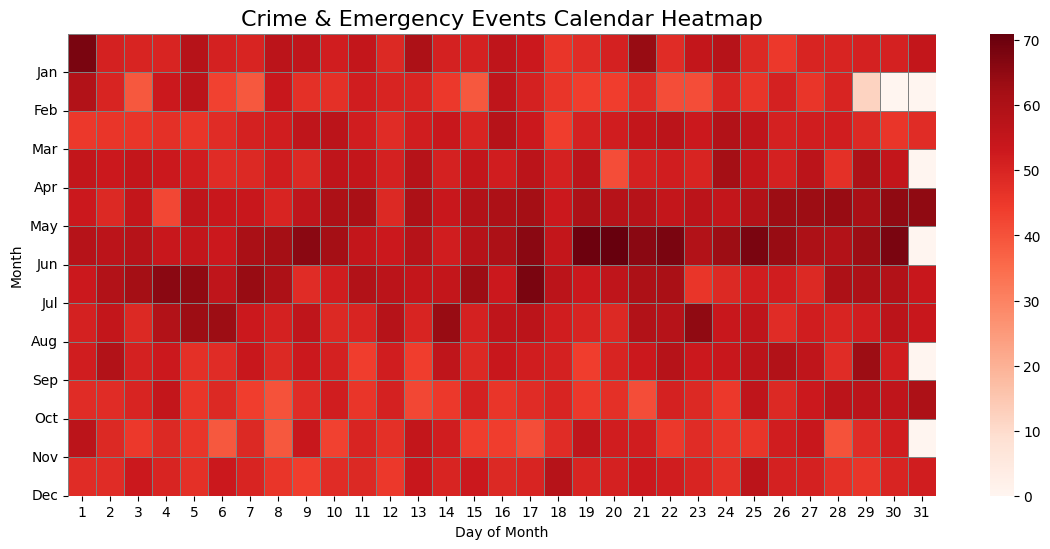

In [ ]:
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'], errors='coerce')
merged_df = merged_df.dropna(subset=['DATE'])
merged_df['day'] = merged_df['DATE'].dt.day
merged_df['month'] = merged_df['DATE'].dt.month
calendar_counts = merged_df.groupby(['month', 'day']).size().reset_index(name='count')

calendar_pivot = calendar_counts.pivot(index='month', columns='day', values='count').fillna(0)

plt.figure(figsize=(14, 6))
sns.heatmap(calendar_pivot, cmap="Reds", linewidths=.5, linecolor='gray')

plt.title("Crime & Emergency Events Calendar Heatmap", fontsize=16)
plt.xlabel("Day of Month")
plt.ylabel("Month")

# Replace month numbers with names
plt.yticks(
    ticks=range(1, 13),
    labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],
    rotation=0
)

plt.show()


1. Do specific days near month start and end need surge staffing due to higher event volumes?

* The darkest cells frequently appear on days 1 to 3 and 27 to 31 with intensities near the top of the scale around 60 to 70 while mid month days trend lighter around 35 to 45 Interpretation schedule overtime and command posts at these edges Caveat counts are heat levels read from color scale and may vary by month length​

2. Should summer months receive additional coverage compared with winter months?

* June and July rows show consistently darker shades than January and February indicating higher daily totals often in the 55 to 70 range versus about 35 to 50 Interpretation allocate seasonal resources to early summer operations Caveat chart aggregates all incident types and does not adjust for weekends or holidays

## Conclusion

**Summary of Findings**

This analysis explored crime activity, emergency response performance, and demographic arrest trends across New York City’s five boroughs. The results show strong geographic differences in both crime rates and service efficiency. Manhattan and Brooklyn report the highest overall arrest volumes, while the Bronx experiences the longest and most inconsistent EMS response times. Staten Island consistently shows the lowest arrest numbers, reflecting lower crime levels. Most arrests involve individuals aged 25 to 44, and incidents tend to rise on certain days and during specific seasons. Shooting incidents are heavily concentrated in the Bronx and Brooklyn, particularly in areas facing greater social and economic challenges.


**Interpretation of Results**


These patterns suggest that crime and emergency service disparities are closely tied to population density, socioeconomic factors, and borough-level resource distribution. Longer EMS response times in high-incident areas indicate potential system strain, while higher crime concentration in disadvantaged neighborhoods highlights the continuing need for targeted prevention and community support. The data collectively emphasize that equitable resource allocation and efficient emergency management are essential for improving citywide safety.


**Recommendations and Next Steps**


To improve safety and efficiency across the five boroughs, city agencies should focus on:
* **Enhancing Coverage:** Strengthen police and EMS presence in high-incident boroughs, particularly the Bronx and Brooklyn.
* **Optimizing Emergency Systems:** Upgrade dispatch coordination and routing to minimize response delays and balance workloads.
* **Expanding Preventive Programs:** Implement data-driven community initiatives aimed at reducing repeat offenses and addressing socioeconomic drivers of crime.
* **Continuous Monitoring:** Track arrest patterns, response times, and demographic shifts to evaluate policy effectiveness and refine strategies over time.

These actions would help reduce crime disparities, improve response reliability, and promote fairer service distribution citywide.



**Closing Reflection**


Overall, this project demonstrates how data-driven analysis can transform complex crime and emergency data into actionable insights. By translating evidence into strategic planning, city officials can make informed decisions that improve safety, enhance efficiency, and promote fairness across all five boroughs of New York City.


##Challenges

During this project, we encountered several data-related challenges that required thoughtful adjustments and problem-solving.

**Large Dataset Sizes**: Many of the available datasets were extremely large, making them difficult to download and process on standard hardware. Handling such high-volume data risked slow performance and system instability. To address this, we selected smaller but representative datasets that maintained analytical value while ensuring computational efficiency.

**Data Reliability and Credibility**: Not all public datasets offered verified or official information. To maintain accuracy and credibility, only trusted government and open data sources-such as NYPD and NYC Open Data-were used. This ensured that the findings were based on authoritative and reliable data.

**Data Cleanliness and Relevance**: Some datasets were overly preprocessed, while others had missing values or inconsistencies. We addressed this by selecting suitable datasets that met our criteria and applying cleaning methods learned from class notebooks to ensure consistency and accuracy.




##References

1. [Mohammad Soltanieh-ha, "BA780 - Introduction to Data Anaytics", Colab Notebooks, Fall 2025](https://github.com/soltaniehha/Intro-to-Data-Analytics)

2. [Datacamp Modules ](https://app.datacamp.com/learn/assignments#)

3. [Previous Years Projects](https://github.com/soltaniehha/Intro-to-Data-Analytics/tree/main/docs/team-projects)


## Generative AI disclosure

Throughout this project, generative AI tools played an important role in supporting various stages of our work. Below is an overview of how these tools were used:

* **Code Review and Debugging:** We used ChatGPT and Gemini to review and refine Python code, correct syntax and structural issues, and ensure our scripts ran efficiently at key stages of the project.
* **Ideation and Guidance:** Generative AI tools were used to help us outline our approach, clarify analysis steps, and refine both text and visualizations. They provided direction when we were uncertain how to proceed and helped us overcome technical and conceptual challenges throughout the project.
Our use of AI was focused on learning and improvement, and all outputs were carefully reviewed to ensure accuracy and originality.
